#선형회귀

In [ ]:
import pandas as pd # 판다스 라이브러리 임포트

##데이터 불러오기

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)

## 데이터 확인

In [ ]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [ ]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [ ]:
X = data.drop('charges', axis=1)
y = data['charges']
print(X.head())
print(y.head())

   age  sex     bmi  children  smoker
0   19    0  27.900         0       1
1   18    1  33.770         1       0
2   28    1  33.000         3       0
3   33    1  22.705         0       0
4   32    1  28.880         0       0
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


## 학습용/검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=444)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 5) (268, 5) (1070,) (268,)


## 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

## 모델 학습

In [ ]:
# fit() 함수의 인수로 독립변수와 종속변수를 입력하여. 학습을 시킵니다.
# 여기서 '학습시킨다' 함은, 데이터를 모델안에 넣어서 독립변수와 종속변수 간의 관계들을 분석해
# 새로운 데이터를 예측할 수 있는 상태로 만드는 겁니다. 이로써 model은 데이터를 통해 학습을 완료해
# 예측을 할 수 있게 되었습니다.
model.fit(X_train, y_train)

LinearRegression()

## 모델 예측

In [ ]:
# predict() 함수로 예측을 할 수 있으며, 괄호 안에는 예측 대상을 넣어주면 됩니다.
pred = model.predict(X_test)

## 모델 평가
 - 모델을 평가하는 방법에는 아래와 같은 방법이 있습니다.
  '테이블로 평가하기'
  '그래프로 평가하기'
  '통계(RMSE)적인 방법으로 평가하기'

###테이블로 평가하기
 - 예측한 값은 pred에, 각각 관측치에 대한 실제 정보는 y_test에 저장되어 있습니다. 예측값이 얼마나 정확한지는 pred와 y_test를 비교하는 것으로 단순하게나마 확인할 수 있습니다.

In [ ]:
comparison = pd.DataFrame({'actual' : y_test, 'pred' : pred})

In [ ]:
comparison.reset_index(drop=True)

,actual,pred
0,13887.96850,16067.593303
1,2927.06470,10232.980736
2,3201.24515,7852.682286
3,9288.02670,10589.158511
4,3176.28770,2021.421158
...,...,...
263,10942.13205,9980.810625
264,10923.93320,12451.617736
265,3161.45400,3683.448974
266,2789.05740,3253.229324


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

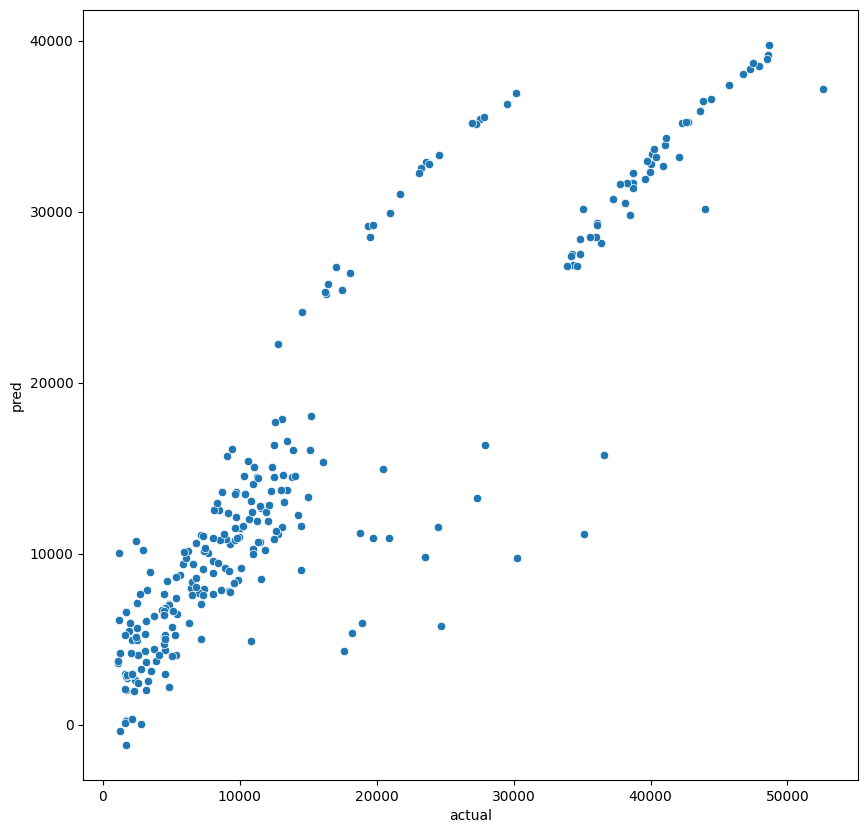

In [ ]:
# x축 : actual(실제값), y축 : pred(예측값)
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

### 통계적인 방법으로 평가하기 : RMSE
 - 연속형 변수를 예측하고 평가할 때 가장 흔하게 쓰이는 RMSE(Root Mean Squared Error(루트 평균 제곱근 오차, 평균 제곱근 편차)를 사용해 보겠습니다.
  - RMSE를 아주 단순하게 말하면 실제값과 예측값 사이의 오차를 각각 합산하는 개념입니다.
  - MAE : 평균 절대 오차, 실제값과 예측값의 사이의 오차에 절대값을 씌운 뒤, 이에 대한 평균을 계산, 값이 작을 수록 좋은 지료입니다 (0에 가까울수록)
  - MSE : 평균 제곱 오차, 실제값과 예측값의 사이의 오차를 제곱한 뒤 이에 대한 평균을 계산, 값이 작을수록 좋은 지표입니다.(0에 가까울수록)
  - RMSE : 루트 평균 제곱 오차, MSE에 루트를 씌운 값으로 가장 일반적으로 사용 됨. 값이 작을 수록 좋은 지표입니다. (0에 가까울수록)
  . R^2 : 결정계수, 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표로, 즉 설명력을 나타냄. 값이 1에 가까울수록 좋은 지표입니다.

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, pred, squared=False))
#print(mean_squared_error(y_test, pred) ** 0.5)

5956.095127330868


약 5965라는 RMSE를 얻었습니다. RMSE는 근본적으로 에러에 대한 합을 계산한 것이기 때문에, 작을수록 예측력이 좋다고 할 수 있습니다. 그럼 5965는 작은편에 속할까요?큰편에 속할까요? 안타깝게도 RMSE를 평가하는 절대적인 기준은 없습니다. 이는 데이터의 특성에 따라 천차만별로 달라질 수 있기 때문에, 어느 수준 이하면 좋은 예측을 보인다는 등의 말을 하기가 어렵습니다. 그래서 RMSE는 절대평가보다는 상대평가에 사용합니다.
같은 데이터에 대한 다양한 알고리즘을 활용한 모델링 작업 시, 그 중 어떤 모델이 가장 뛰어난 예측력을 보이는지를 판단할 때 RMSE가 가장 낮은 모델을 선택하면 됩니다.

In [ ]:
model.score(X_train, y_train)

0.725882416431521

- R2는 독립변수로 설명되는 종속변수의 분산 비율을 나타내는 통계적 측정값입니다.
- R2 = SSR / SST
- R2는 비율이므로 최대 1까지 나올수 있으며, 좋은 모델일 수록 1에 가깝고, 0.7 ~ 0.8이상이면 일반적으로 괜찮은 수치라고 볼 수 있습니다.

In [ ]:
model.coef_

array([ 2.51297889e+02, -2.16819317e+01,  3.24770879e+02,  3.41309156e+02,
        2.31613711e+04])

In [ ]:
pd.Series(model.coef_, index = X.columns)

age           251.297889
sex           -21.681932
bmi           324.770879
children      341.309156
smoker      23161.371058
dtype: float64

In [ ]:
model.intercept_

-11731.980592535898

In [ ]:
# 릿지 회귀(Ridge Regression)
# - 선형회귀 모델에 L2정규화를 적용한 모델로 오버피팅을 억제하는 효과가 있습니다.
from sklearn.linear_model import Ridge
# 라쏘 회귀 (Lasso Regression)
# - 선형회귀 모델에 L1정규화를 적용한 모델로 피처셀렉션 및 오버피팅을 억제하는 효과가 있습니다.
from sklearn.linear_model import Lasso
# 엘라스틱넷 (Elastic Net)
# - 릿지회귀와 라쏘회귀의 단점을 절충시킨 모델입니다.
from sklearn.linear_model import ElasticNet

#로지스틱 회귀
- 로지스틱 회귀 또한 선형회귀처럼 기본 분석 모델입니다. 로지스틱 회귀분석은 알고리즘의 근간을 선형회귀분석에 두고 있어서 선형회귀분석과 상당히 유사하지만 다루는 문제가 다릅니다. 선형회귀분석은 연석된 변수를 예측하는 반면, 로지스틱 회귀분석은 Yes/No처럼 두 가지로 나뉘는 분류문제를 다룹니다.
- 선형회귀분석과 마찬가지로, 기본 알고리즘이라서 꼭 알고 있어야 합니다. 실제 이진분류가 필요한 상황이 많기 때문에 두 가지 범주를 구분하는 간단한 예측에 유용하며 딥러닝에서도 기본 지식입니다.

##라이브러리 및 데이터 불러오기

In [ ]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

In [ ]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


- 독립변수 8개와 종속변수(Survived) 1개를 볼 수 있습니다. 변수 이름에 대한 설명은 다음과 같습니다.

 - Pclass : 비행기처럼, 일종의 티켓 클래스입니다.
 - Name : 승객 이름
 - Sex : 성별
 - Age : 나이
 - SibSp : 함께 탑승한 형제 및 배우자의 수
 - Parch : 함께 탑승한 부모 및 자녀의 수
 - Ticket : 티켓 번호
 - Embarked : 승선한 항구 (C=CherBourg, Q=Queenstown, S=Southampton)
 - Survived : 생존유무 (1=생존, 0=사망)

In [ ]:
data.info() # 변수 특징 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
data.isnull().sum() # 결측치 확인

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Embarked    0
Survived    0
dtype: int64

In [ ]:
data.describe() # 통계 정보 출력

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [ ]:
data['Pclass'].unique()

array([3, 1, 2])

- 상관관계 : 두 변수 간의 관련성, 예를 들어 변수 A가 증가할 때, B도 증가하면 상관관계가 있다고 할 수 있습니다. (반대로, A가 증가할 때 B가 감소한다면, 이 또한 음의 방향으로 상관관계가 있다 할수 있습니다)
- 상관관계의 강도에 대한(절대값 기준) 일반적인 해석은 다음과 같습니다.
  - 0.2 이하 : 상관관계가 거의 없음.
  - 0.2 ~ 0.4 : 낮은 상관관계
  - 0.4 ~ 0.6 : 중간 수준의 상관관계
  - 0.6 ~ 0.8 : 높은 상관관계
  - 0.8 이상 : 매우 높은 상관관계

In [ ]:
data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

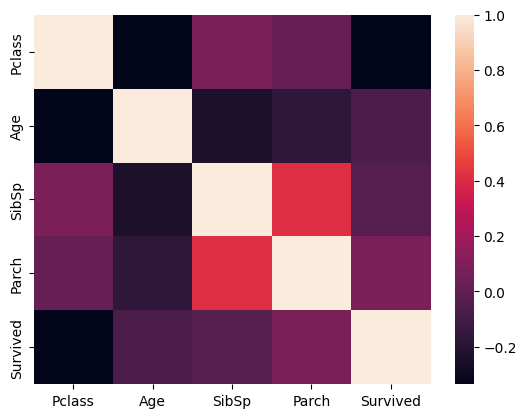

In [ ]:
# 상관관계에 대한 히트맵 생성
sns.heatmap(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].corr())
# 그래프 출력 (맷플롯립과 시본이 최근 버전이면 체외해도 됨.)
# plt.show()

<Axes: >

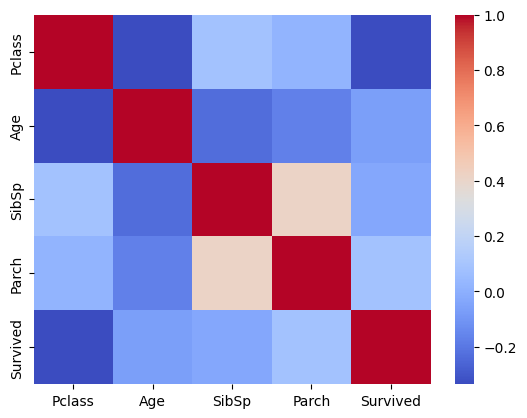

In [ ]:
sns.heatmap(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].corr(), cmap='coolwarm')

<Axes: >

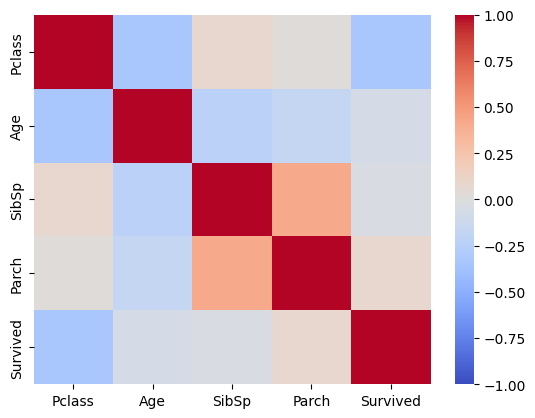

In [ ]:
sns.heatmap(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].corr(), cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

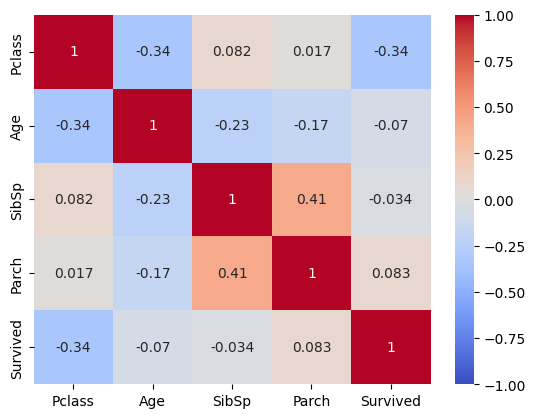

In [ ]:
sns.heatmap(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Survived']].corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

##전처리 : 범주형 변수 변환하기 (더비 변수와 원-핫 인코딩)
- 타이타닉 데이터셋에는 자료형이 object인 변수들, 즉 데이터가 숫자가 아닌 문자인 변수가 4개 있습니다. 기본적으로 머신러닝 알고리즘에서는 문자열로 된 데이터를 이해하지 못합니다. object형까지도 처리해주는 알고리즘 대부분은 object컬럼들을 숫자 데이터로 변환가능 기능을 제공합니다.

In [ ]:
data['Name'].nunique()

889

In [ ]:
data['Sex'].nunique()

2

In [ ]:
data['Ticket'].nunique()

680

In [ ]:
data['Embarked'].nunique()

3

In [ ]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [ ]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [ ]:
pd.get_dummies(data, columns = ['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [ ]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'], drop_first = True)

In [ ]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


##모델링 및 예측하기

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장
y = data['Survived']                # 데이터셋에서 종속변수만 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)

##예측 모델 평가하기
- 이진분류 평가지표로는 정확도, 오차행렬, 정밀도, 재현율, F1 Score, 민감도, 특이도, AUC 등이 있습니다.
- 이중 정확도는 예측값과 실제값을 비교하여, 얼마나 맞추었는지를 확인하는 겁니다. 즉 시험셋 100개를 예측하고, 그 중 90개를 정확히 맞췄다면 정확도가 0.9가 되고, 모두 맞추면 1.0이 됩니다.

In [ ]:
from sklearn.metrics import accuracy_score  # 정확도 라이브러리 임포트
accuracy_score(y_test, pred)                # 실제값과 예측값으로 정확도 계산

0.7808988764044944

In [ ]:
model.coef_

array([[-1.1821853 , -0.03991491, -0.32121137,  0.00779287, -2.56882216,
        -0.07787206, -0.23503725]])

In [ ]:
len(model.coef_)

1

In [ ]:
print(model.coef_[0])
print(len(model.coef_[0]))

[-1.1821853  -0.03991491 -0.32121137  0.00779287 -2.56882216 -0.07787206
 -0.23503725]
7


In [ ]:
# model.coef_ 를 7개 값이 되도록 풀어서 컬럼 이름을 매핑
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182185
Age          -0.039915
SibSp        -0.321211
Parch         0.007793
Sex_male     -2.568822
Embarked_Q   -0.077872
Embarked_S   -0.235037
dtype: float64

- Parch값을 제외하고는 모두 음수입니다. 목표값인 Survived가 1이면 생존이고, 0이면 사망이라는 점을 유념하고 변수들의 영향을 해석하겠습니다.
  - 우선 Pclass는 음의 계수를 가지고 있기 때문에 Pclass가 높을 수록 생존 가능성이 낮습니다. Pclass는 낮은 숫자일수록 비행기의 퍼스트 클래스처럼 더 비싼 티켓이기 때문에 더 유리하게 작용하지 않을까 추측해볼수 있습니다.
  - Age는 낮을수록 생존확률이 높습니다.
  - Sex는 여성이 생존확률이 높습니다.

## 피처 엔지니어링
- 피처 엔지니어링 이란 기존 데이터를 손보아 더 나은 변수를 만드는 기법입니다.(특징공학 또는 특성공학이라고도 합니다), 앞에서 경험한 더미변수를 만드는 일도 일종의 피처 엔지니어링 입니다. 더미 변수를 쓰지 않았다면 해당 컬럼(Sex와 Embarked)을 모두 버려야 했으나, 더미변수로 만들어 예측에 도움이 되는 변수를 얻은 겁니다.

In [ ]:
data['family'] = data['SibSp'] + data['Parch']        # SibSp와 Parch 변수 합치기
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)   # SibSp와 Parch 변수 삭제
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [ ]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

- 총 독립변수 수가 하나 줄었지만 기존보다 정확도가 0.012 정도 높아졌습니다. 이렇게 모델링은 한번에 끝내는 것이 아니라, 다양한 시도를 해가며 수없이 재반복해 더 나은 결과물을 얻어내는 과정입낟.
- 여기서는 0.4정도의 상관관계가 있는 변수를 합쳐주면 더 좋은 결과를 얻을 수 있을 겁니다. 그런데 언제 유효한 기준은 아닙니다. 피처엔지니어링에는 정답이 없습니다.

#K-최근접 이웃(KNN(K-Nearest Neightbors))
- K-최근접 이웃은 거리 기반 모델입니다. 즉 각 데이터 간의 거리를 활용해서 새로운 데이터를 예측하는 모델입니다. 이때 가까이에 있는 데이터를 고려하여 예측값이 결정됩니다. K Nearest Neighbors라는 이름은 이를 잘 반영하고 있는데, K개의 가장 가까운 이웃 데이터에 의해 예측된다는 의미입니다.
- 주로 분류에서 사용되며, 로지스틱회귀로 해결할 수 없는 3개 이상의 목표 변수들도 분류할 수 있습니다.
- 작은 데이터셋에 적합합니다

##라이브러리 및 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [ ]:
# 결측치 확인 (alcohol = 2, nonflavanoid_phenols = 5)
data.isnull().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


##목표값에서 고유값 확인하기

In [ ]:
data['class'].unique()

array([0, 1, 2])

In [ ]:
data['class'].nunique()

3

In [ ]:
data['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
data['class'].value_counts().index

Index([1, 0, 2], dtype='int64', name='class')

<Axes: xlabel='class', ylabel='count'>

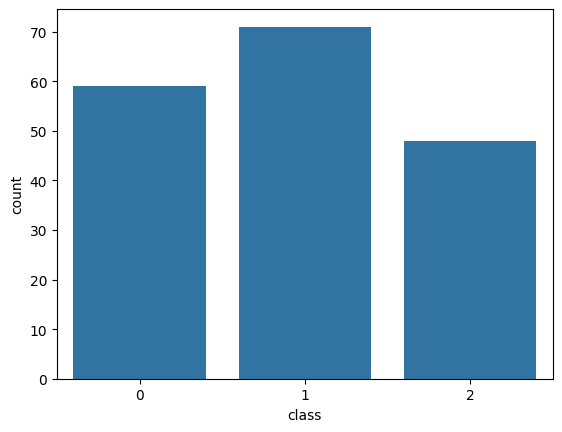

In [ ]:
sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts())

<Axes: ylabel='count'>

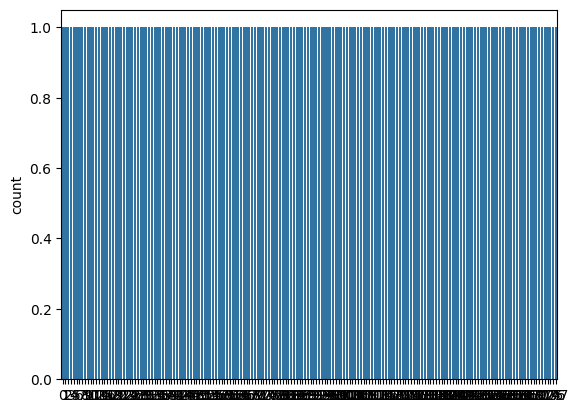

In [ ]:
sns.countplot(data['class'])

##전처리 : 결측치 처리하기

###결측치를 쉽게 확인하는 방법
- 우선 결측치를 확인하는 가장 직접적인 방법은 isna() 함수를 쓰는 겁니다.

In [ ]:
data.isna()    # 값을 결측치 여부에 따라 True/False 로 변환

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
data.mean()

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [ ]:
# 0과1로 구성된 값들을 평균을 냈기 때문에, 이 값은 해당 컬럼에 몇 퍼센트나 결측치가 있는지를 보여줍니다.
# alcohol에 약 1.12%, nonflavanoid_phenols에 약 2.81%가 결측치로 표시됩니다.
data.isna().mean()

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

###결측치를 처리하는 방법
- 결측치를 처리하는 방법에는 아래와 같은 방법이 있습니다.
  - 결측치 행 제거
  - 결측치 컬럼 제거
  - 결측치 채우기

####결측치 행 제거 : dropna()

In [ ]:
# 결측치 행 제거 : dropna()
data.dropna() # 결측치가 있는 행 제거

# 적용한 내용 원본 df에 적용하는 방법
#data = data.dropna()
#data.dropna(inplace=True)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.dropna().isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [ ]:
# 지정된 변수의 결측치 행만 제거하기
data.dropna(subset = ['alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.dropna(subset=['alcohol']).isna().mean()

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

####결측 변수 제거하기 : drop()
- 두 번째 방법은 변수 자체를 제거하는 겁니다. 2개 변수에만 결측치가 있으니 해당 변수들을 제거해 결측치가 없는 데이터로 만듭니다.

In [ ]:
data.drop(['alcohol', 'nonflavanoid_phenols'], axis=1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


####결측값 채우기 : fillna()
- 결측치에 값을 채워넣는 방법입니다. 일반적으로 평균값이나 중위값을 이용합니다.

In [ ]:
data.fillna(-99)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
# 평균값으로 결측치 채우기
data.fillna(data.mean())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


##결측치 처리 방식 선택하기
- 결측치를 처리하는 일반적인 방법은 dropna()를 사용하여 결측치 행을 지우는 겁니다.
- 평균 등을 이용하여, 결측치를 채우면, 아무리 비슷한 값을 채운다고 할지라도 실제값과 일치할 가능성은 매우 낮기 때문에 오차의 원인이 될 수 밖에 없습니다. 즉 데이터에 노이즈가 더해진 효과를 내게 됩니다.
- 그런데 dropna()를 사용한 결측치 행 제거 방법에는 큰 단점이 있습니다.
  - 경우에 따라서는 너무 과도하게 많은 데이터가 삭제될 수 있습니다. 지금은 단 7행만 삭제되지만, 만약 특정변수의 90%가 결측치이면, 90%데이터가 삭제됩니다.
  - 그래서 행을 지우는 방식을 사용하려면 결측치 비중이 매우 낮아야 하고, 데이터 크기도 충분히 커야 합니다. 그래야 결측치를 삭제해도 큰 영향을 미치지 않게 됩니다.

In [ ]:
# 결측치를 중위값을 채우기
data.fillna(data.median(), inplace=True)

In [ ]:
data.isna().mean()  # 결측치 확인하기

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

##스케일링
- 스케일링은 데이터의 스케일을 맞추는 작업입니다. 인위적으로 각 컬럼이 비슷한 범위를 가지도록 만드는 작업입니다.
- 스케일링에는 아래와 같은 종류가 있습니다.
  - 표준화 스케일링 : 평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는데 사용
  - 로버스트 스케일링 : 데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을때 사용
  - 최소-최대 스케일링 : 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
  - 정규화 스케일링 : 행 기준의 스케일링이 필요할 때 사용하나 실제로 거의 사용하지 않음.

In [ ]:
 from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

###표준화 스케일링

In [ ]:
data_st = data.copy()
st_scaler = StandardScaler()            # 스케일러 지정
st_scaler.fit(data_st)                     # 학습
# transform() : 스케일러가 fit()을 통해 학습한 정보를 통해 데이터를 변환, 즉 스케일링하는 함수
st_scaled = st_scaler.transform(data_st)   # 학습에서 얻은 정보 계산

In [ ]:
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [ ]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [ ]:
st_scaled = pd.DataFrame(st_scaled, columns = data_st.columns)

In [ ]:
round(st_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


###로버스트 스케일링
- 로버스트 스케일링은 평균과 표준편차 대신 사분위값을 이용하여 계산됩니다.

In [ ]:
rb_scaler = RobustScaler()

In [ ]:
data_rb = data.copy()
rb_scaled = rb_scaler.fit_transform(data_rb)
rb_scaled = pd.DataFrame(rb_scaled, columns = data_rb.columns)

In [ ]:
round(rb_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


###최소-최대 스케일링 (Min-Max Scaling)
- Min-Max Scaling의 특징은 모든 컬럼에서 최대값이 1, 최소값이 0인 형태로 변환된다는 겁니다.

In [ ]:
data_mm = data.copy()

mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data_mm)
mm_scaled = pd.DataFrame(mm_scaled, columns = data_mm.columns)
round(mm_scaled.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


### 스케일링 방식 선택하기
- 우선 **아웃라이어의 유무에 따라 판단**하는데, 아웃라이어의 영향이 큰 데이터이고 이를 피하고 싶다면 로버스트 스케일링이 적합합니다. 표준화 스케일링은 평균과 표준편차를 이용하고, 최소-최대 스케일링은 최소/최대값을 이용하는데, 이들은 모두 아웃라이어가 있을때 민감하게 반응하기 때문입니다. 반면 로버스트 스케일링은 사분위값을 사용하기 때문에 아웃라이어가 있어도 영향을 덜 받습니다.
- 때에 따라서는 데이터의 기존 분포를 최대한 유지하여 스케일링하는게 필요할 수도 있습니다.
  - 이런 경우에는 최소-최대 스케일링이 적합합니다. 표준화 스케일링은 모든 데이터를 표준정규분포형태, 즉 좌우 대칭의 종 모양으로 변경하기 때문에, 여기에 적용하면 아웃라이어의 영향을 받으면서도 기존의 데이터 분포에 대한 특징을 상실하게 됩니다. 반면 최소-최대 스케일링은 최대값 1과 최소값 0의 범위에서 기존 데이터의 분포를 최대한 그대로 옮겨 담아 냅니다.
- 표준화 스케일링은 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황에서 무난하게 사용됩니다. 데이터의 분포가 정규분포와 상당히 거리가 있거나 아웃라이어가 상당수 있는 경우에 표준화 스케일링을 사용하면 기존 데이터의 특징을 상당히 잃어버릴 수 있는 주의해야 합니다.


####스케일링 별 특징
- 표준화 스케일링
  - 데이터에 아웃라이어가 존재할때 아웃라이어의 영향을 받습니다. 평균0, 분산1이 되게끔 분포시키기 때문에, 데이터의 기존 분포 형태가 사라지고 정규분포를 따르는 결과물을 가져옵니다.
- 로버스트 스케일링
  - 데이터의 아웃라이어가 존재할때, 아웃라이어의 영향을 받지 않습니다. 변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타납니다.
- 최소-최대 스케일링
  - 표준화 스케일링과 마찬가지로 아웃라이어의 영향을 받게 됩니다. 위의 두 스케일러와 비교했을 때, 데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화 시킵니다. 데이터의 범위는 0~1로 나타납니다.

#### 머신러닝 스케일링 적용 시, 주의사항
- 1. 스케일링 대상에서 종속변수를 제외해야 합니다.
 - 앞서 스케일링 연습 시, 결과물에서 종속변수인 class가 0,1,2가 아닌 다른 값들로 전부 바뀌었는데, 우리는 class라는 컬럼을 예측해야 하기 때문에 이 변수는 그대로 남겨두어야 합니다.
- 2. 스케일링 전에 훈련셋과 시험셋을 나누어야 합니다.
 - 훈련셋에서 fit()으로 스케일링을 위한 값을 학습시키도, 이 값을 활용하여 훈련셋과 시험셋을 변환해야 합니다.

####스케일링 적용하기

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444)

#####fit(학습) + transform(트랜스폼)
- Case1.

In [ ]:
mm_scaler = MinMaxScaler()  # 최소-최대 스케일러 객체 생성
mm_scaler.fit(X_train)      # 학습

MinMaxScaler()

In [ ]:
X_train_scaled = mm_scaler.transform(X_train)   # 학습셋 트랜스폼
x_test_scaled = mm_scaler.transform(X_test)     # 시험셋 트랜스폼

- Case2.

In [ ]:
mm_scaler = MinMaxScaler()                            # 최소-최대 스케일러 객체 생성
X_train_scaled = mm_scaler.fit_transform(X_train)     # 학습셋 학습 및 트랜스폼
X_test_scaled = mm_scaler.transform(X_test)           # 시험셋 트랜스폼

##모델링 및 예측/평가하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()           # KNN 모델 생성
knn.fit(X_train_scaled, y_train)      # 학습
pred = knn.predict(X_test_scaled)     # 예측

In [ ]:
pred

array([1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2])

In [ ]:
print(X_train_scaled.shape, X_test_scaled.shape)
print(len(pred))

(142, 13) (36, 13)
36


In [ ]:
# 정확도(accuracy) 예측
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

##하이퍼파리미터 튜닝하기
- KNN알고리즘에는 아주 중요한 매개변수가 하나 있습니다. 바로 n_neighbors라는 이름의 매개변수인데, 예측에 가까운 이웃을 몇 개나 고려할지를 정합니다.
- n_neighbors는 기본 값이 5입니다.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)   # KNN 모델 생성
knn.fit(X_train_scaled, y_train)            # 학습
pre = knn.predict(X_test_scaled)            # 예측
accuracy_score(y_test, pred)                # 정확도 계산

1.0

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
pre = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

1.0

In [ ]:
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  print(i, accuracy_score(y_test, pred))

1 0.9722222222222222
2 0.9722222222222222
3 0.9722222222222222
4 0.9722222222222222
5 1.0
6 1.0
7 1.0
8 0.9722222222222222
9 1.0
10 0.9444444444444444
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


In [ ]:
scores = []

for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  acc = accuracy_score(y_test, pred)
  scores.append(acc)

In [ ]:
scores

[0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 1.0,
 1.0,
 1.0,
 0.9722222222222222,
 1.0,
 0.9444444444444444,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

<Axes: >

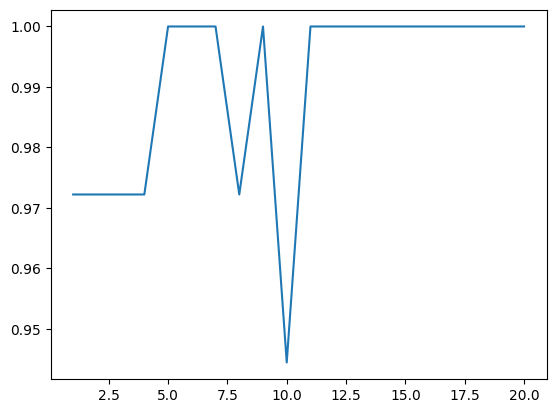

In [ ]:
sns.lineplot(x=range(1, 21), y=scores)

##이해하기 : K-최근접 이웃
- KNN 알고리즘은 상당히 간단한 원리로 작동합니다. 새로운 데이터를 예측할때, 거리를 기반으로 하여 인접한 데이터와 같은 종류로 분류해내는 기법입니다.(예를 들어, 인접한 데이터가 모두 파랑이면 나도 파랑), 거리 기반과 스케일리의 의미를 파악해 KNN을 이해해봅시다


#나이브 베이즈(Naive Bayes) 모델
- 나이브 베이즈는 베이즈 정리를 적용한 조건부 확률 기반의 분류 모델입니다.
  - 여기서 조건부 확률은 A가 일어났을때 B가 일어날 확률을 의미합니다.예를 들어, '무료라는 단어가 들어있을때 해당 메일이 스팸일 확률' 같은 겁니다. 이러한 특징으로 스팸 필터링을 위한 대표적인 모델로 꼽힙니다.
- 최근에는 딥러닝 같은 대안이 있어서 나이브 베이즈 모델을 쓰고자 하는 상황이 많지는 않습니다. 그래도 스펨 메일 필터처럼 자연어 처리가 목적일 때는 여전히 나이브 베이즈 모델이 좋은 선택이 될 수 있습니다 (딥러닝이 자연어 처리에 더 탁월한 모습을 보여주지만, 딥러닝보다 간단한 방법으로 자연어 처리를 원할 때)

###라이브러리 및 데이터 불러오기 & 데이터 확인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [ ]:
data.head()
# 종속변수 : target (스팸인지 아닌지 정보가 들어있음)
# 독립변수 : text (스팸여부를 판별하는데 사용할 문자열)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['target'].unique()
# ham  : 스팸 = X
# span : 스팸 = O

array(['ham', 'spam'], dtype=object)

###전처리 : 특수 기호 제거하기
- 한 가지 처리할 게 있습니다. 바로 쉼표,마침표 등과 같은 특수 기호들입니다. 자연어를 다룰 때 데이터의 기준은 단어입니다. 단어를 처리할 때 특수 기호는 노이즈가 되므로 제거해야 합니다. 우선은 제거할 특수기호를 목록으로 마련해야 합니다.

In [ ]:
# 특수 기호 목록은 파이썬에 내장 된 string 에서 얻을 수 있습니다.
import string

In [ ]:
# 특수기호목록
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
sample_string = data['text'].loc[0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# 문자열 한글자 씩 전체 출력!
for i in sample_string:
  print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [ ]:
# 특수문자아닌 것 가져오기
for i in sample_string:
  if i not in string.punctuation:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [ ]:
# 문자열에서 특수기호를 제외한 문자들을 리스트 형태로 변환
new_string = []                     # 1. 빈 리스트 생성
for i in sample_string:             # 문자열 순회
  if i not in string.punctuation:   # 특수 기호가 아니면..
    new_string.append(i)            # 리스트에 문자 추가

new_string = ''.join(new_string)    # 리스트를 문자열로 변환

In [ ]:
new_string

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
# 문장 별, 특수문자를 제외하는 함수 생성
def remove_punc(x):
  new_string = []
  for i in x:
    if i not in string.punctuation:
      new_string.append(i)
  new_string = ''.join(new_string)
  return new_string

In [ ]:
remove_punc(sample_string)      # 특수기호 삭제 함수 호출

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
# data['text']
remove_punc(data['text'])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

In [ ]:
#apply()함수를 사용해 데이터프레임 전체가 아닌 text변수에, 즉 판다스 시리즈 형태에 적용해 보겠습니다.
data['text'].apply(remove_punc)   # 함수에 한 행씩 적용되도록 실행

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [ ]:
data['text'] = data['text'].apply(remove_punc)    # 원본데이터 업데이트

In [ ]:
data.head()

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


###전처리 : 불용어 제거하기
- 불용어는 자연어 분석에 큰 도움이 안되는 단어를 의미합니다. 이러한 단어를 제거해주면, 데이터를 조금이나마 더 가볍게 만들 수 있습니다.
- 자연어 처리에서는 각 단어가 하나의 독립변수처럼 작용하기 때문에 지금은 컬럼이 2개 뿐인데도 분석과정에서 데이터를 방대하게 펼치게 됩니다. 그래서 불용어를 제거해 조금이라도 부담을 더는 겁니다.
- 분석의 목적에 따라 불용어가 달라질 수 있습니다. 예를 들어 지금처럼 스팸문자를 예측할때와, 상품리뷰의 긍정/부정을 예측할 때 의미 있는 단어의 성격이 다를 수 있습니다.

In [ ]:
#불용어를 목적에 맞게 작성해도 되지만, 여기에서는 nltk 라이브러리에서 제공되는 불용어 목록을 사용합니다.
import nltk                 # 임포트
nltk.download('stopwords')  # 불용어 목록 가져오기

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords   # 불용어 목록 임포트

```python
stopwords.words('english')
```
'english'는 영문 불용어를 지정하는 속성입니다. 한국어 불용어를 지정하려면, 'korea'를 넣으면 될 것 같지만 안됩니다. NLTK라이브러리는 한국에 불용어가 제공되지 않습니다. 한국어 텍스트를 다룰려면 불용어를 별도로 리스트 형태로 만들어서 지정하시거나, 구글에서 검색하여 몇 가지 준비된 한국어 불용어를 활용하면 됩니다. 또한 한국어의 경우 영어와는 달리 단어에 조사가 붙기 때문에 특정 단어를 포착하기 위해 이러한 부분도 처리해야 하는데, 이 책에서느 NLP가 주목적이 아니므로 해당 내용까지는 다루지 않습니다. 한국어 불용어는 www.ranks.nl등에서 받을 수 있습니다.
- 한국어 불용어 : https://www.ranks.nl/stopwords/korean

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# stopwords는 현재 24개 언어의 불용어를 제공합니다.
from nltk.corpus import stopwords
print(stopwords.fileids())
print(stopwords.fileids().index('chinese'))
# print(stopwords.fileids().index('japan'))
# print(stopwords.fileids().index('korea'))

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
5


- 특수기호는 문자 하나하나를 불러와서 확인했던 반면, 이번에는 단어 하나하나를 불러와야 합니다. 그러나 문장을 그대로 for문에 적용하면 아까처럼 문자 하나씩 불러오므로 문장을 단어 단위로 쪼개는 작업이 필요합니다.

```python
sample_string = 'This is not - SPAM'
sample_string.split('-')  # 특정 문자를 기준으로 문자열 분할
```

In [ ]:
sample_string = data['text'].loc[0]
sample_string.split()   # 단어 단위로 문장 분할

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [ ]:
for i in sample_string.split():             # 순회
  if i not in stopwords.words('english'):    # 불용어가 아니면
    print(i)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


- 변환 된 단어를 보면, Go 나 Cine 같은 단어는 첫 글자가 대문자입니다. 파이썬은 대소문자를 구분합니다. stopwords에 들어있는 단어들은 모두 소문자로 되어 있습니다. 정확하게 하려면 확인할 단어가 모두 소문자이어야 합니다

```python
sample_word = 'nAive_Bayes'
# lower() - 소문자로 바꿉니다.
sample_word.lower()
# upper() - 대문자로 바꿉니다.
sample_word.upper()
# capitalize() - 단어의 첫 문자만 대문자로, 나머지는 소문자로 바꿉니다.
sample_word.capitalize()
```

In [ ]:
# lower() 함수를 사용해 모두 소문자로 바꿉니다.
for i in sample_string.split():                     # 순회
  if i.lower() not in stopwords.words('english'):   # 불용어가 아니면 소문자로 변환
    print(i.lower())                                # 소문자로 출력

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [ ]:
new_string = []
for i in sample_string.split():
  if i.lower() not in stopwords.words('english'):
    # 소문자로 변환한 단어가 불용어가 아니면,
    new_string.append(i.lower())    # 문자단위로 추가

new_string = ' '.join(new_string)
new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
# stopwords를 제거하는 코드 작성,
# text 컬럼 전체에 적용해야 하므로, 별도의 함수를 만들고,
# apply()를 각 데이터 라인에 적용

In [ ]:
def stop_words(x):
  new_string = []
  for i in x.split():
    if i.lower() not in stopwords.words('english'):
      new_string.append(i.lower())
  new_string = ' '.join(new_string)
  return new_string

In [ ]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

###전처리 : 목표 컬럼 형태 변경하기
- 목표컬럼은 문자(spam or ham) 입니다. 문자 형식의 데이터로 모델링에 에러를 유발하지는 않지만, 때에 따라 해석에 문제가 생길 수도 있기 때문에 숫자로 변환하겠습니다. 변환에는 map() 함수를 사용합니다.

```python
# map() : map()함수는 딕셔너리 타입의 데이터를 사용하여 매칭되는 값을 불러오도록 사용할 수 있습니다.
sample1 = pd.Series(['a', 'b', 'c'])
sample1.map({'a' : 'apple', 'b' : 'banana', 'c' : 'cherry'})
```

In [ ]:
# 스팸이면 1, 아니면 0으로 변환합니다.
# data['target'].head()
data['target'] = data['target'].map({'spam' : 1, 'ham' : 0})      # 텍스트를 숫자로 변환
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

###전처리 : 카운트 기반으로 벡터화하기
- 카운트 기반 벡터화는 말 그대로 문자를 개수 기반으로 벡터화하는 방식입니다. 데이터 전체에 존재하는 모든 단어들을 사전처럼 모은 뒤에 인덱스를 부여하고, 문장마다 속한 단어가 있는 인덱스를 카운트 하는 겁니다.

In [ ]:
X = data['text']      # 독립변수
y = data['target']    # 종속변수

In [ ]:
print(X.shape, y.shape)

(5574,) (5574,)


In [ ]:
# 벡터화에 사용할 CountVectorizer 임포트
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()    # 객체 생성
cv.fit(X)                 # 학습하기

cv.vocabulary_            # 단어와 인덱스 출력

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [ ]:
X = cv.transform(X)      # 데이터 변환(트랜스폼)
print(X.shape)
print(X)

(5574, 9437)
  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [ ]:
data.loc[0]['text']   # 0번째 행의 'text'열의 값 선택

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
print(X.shape, y.shape)

(5574, 9437) (5574,)


###모델링 및 예측/평가하기

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444)

- 나이브 베이즈 알고리즘으로 MultinomialNB 모듈을 사용합니다. 역시 sklearn 라이브러리에서 불러올 수 있습니다.

- MultinomialNB 모듈
  - 다항 분포에 대한 Navive Bayes 알고리즘입니다. 다항분포(Multinomial) 외에 정규분포(Gaussian), 베르누이분포에 따른 NB모듈이 있으며, 데이터 분포의 특성을 명확히 파악하기 어렵다면 이 세가지의 모듈을 모두 사용하여 가장 결과가 좋은 모델을 선택하시면 됩니다.

In [ ]:
 from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()           # 모델 객체 생성
model.fit(x_train, y_train)       # 모델 학습
pred = model.predict(x_test)      # 모델 예측

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, pred)      # 정확도 계산

0.9739910313901345

In [ ]:
print(confusion_matrix(y_test, pred))   # 혼동행렬 출력

[[959  16]
 [ 13 127]]


<Axes: >

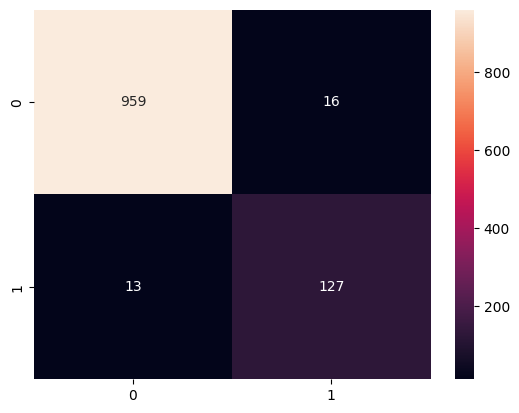

In [ ]:
# 혼동행렬 히트맵 출력
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f')

###이해하기 : 나이브 베이즈 모델
 - 나이브 베이즈 알고리즘의 근간은 베이즈 정리입니다. 따라서 나이브 베이즈 알고리즘을 이해하려면 조건부 확률을 구하는 베이즈 정리를 이해해야 합니다.

# 08. 결정트리(Decision Tree) : 연봉예측하기
- Decision Tree는 관측값과 목표값을 연결시켜주는 예측 모델로서 나무 모양으로 데이터를 분류합니다.
  - 수 많은 트리 기반 모델의 기본모델이 되는 중요 모델입니다.
- 트리기반의 모델은 선형 모델과는 전혀 다른 특징을 가지는데, 선형 모델이 각 변수에 대한 기울기 값들을 최적화하여 모델을 만들어나갔다면, 트리모델에서는 각 변수의 특정 지점을 기준으로 데이터를 분류해가며 예측모델을 만듭니다.
  - 예를 들어 남자/여자로 나눠서 묙표값을 평균치로 나눈다거나, 나이를 30세이상/미만 인 두 부류로 나눠서 평균치를 계산하는 방식으로 데이터를 무수하게 쪼개어 나가고, 각 그룹에 대한 예측치를 만들어냅니다.
  - ※ 예측력과 성능으로만 따지만 결정 트리 모델을 사용할 일은 없습니다.
    - 시각화가 매우 뛰어나다는 유일한 장점이 있을 뿐입니다.
    - 하지만 앞으로 배울 다른 트리 기반 모델을 설명하려면, 결정 트리를 알아야 합니다.
    - 트리 기반 모델은 딥러닝을 제외하고는 현재 가장 유용하게 많이 쓰이는 트렌드이기 때문에 트리모델을 필수로 알아둬야 합니다.


- 예측력
  - 예측력이란 모델 학습을 얼마나 좋은 예측치를 보여주는가를 의미한다.
- 설명력
  - 설명력은 학습 된 모델을 얼마나 쉽게 해석할 수 있는지를 뜻한다.

- 즉, 단순한 알고리즘 일수록 예측력이 상대적으로 떨어질 수 있으나 해석이 용이하며, 복잡한 알고리즘은 예측력이 뛰어난 만큼 해석은 어렵다.
- 예측력과 설명력 중, 어느 쪽을 택해야 하는지는 상황에 따라 다릅니다.
  - 예를 들어 의학 계열에서 특정 질병의 발병률에 대한 예측 모델을 만들 때는, 발병률을 높이거나 억제하는 중요한 요인을 밝히는데는 설명력이 좋은 알고리즘이 적합할 수 있습니다.
  - 다른 예로, 사기거래를 예측하는 모델에서는 요인보다는 더 정확하게 사기거래를 잡아낼 수 있어야 하므로 예측력이 높은 알고리즘이 더 적합할 수 있습니다.
- 유용한 곳
  - 종속변수가 연속형 데이터와 범주형 데이터 모두에 사용할 수 있습니다.
  - 모델링 결과를 시각화할 목적으로 가장 유용합니다.
  - 아웃라이어가 문제될 정도로 많을 때 선형 모델보다 좋은 대안이 될 수 있습니다.

###8.2.라이브러리 및 데이터 불러오기, 데이터 확인하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
# skipinitialspace는 각 데이터의 첫 자리에 있는 공란을 제거합니다.
data = pd.read_csv(file_url, skipinitialspace = True)


In [ ]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [92]:
# 종속변수는 class입니다. unique() 함수로 몇 가지 값이 있나 확인합니다.
data['class'].unique()      # 고유값 확인

KeyError: 'class'

In [ ]:
data.info()   # 변수 특징 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [ ]:
data.isnull().sum()
#data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [ ]:
data.describe()     # 통계정보 출력

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


###8.3 전처리 : 범주형 데이터

In [ ]:
data['class'] = data['class'].str.lstrip()
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# 가장 먼저 처리할 변수는 종속변수인 class 입니다.
# 차후 해석에 혼선이 없도록 50K이하 = 0, 50K초과 = 1로 변경
data['class'] = data['class'].map({'<=50K' : 0, '>50K' : 1})

In [ ]:
data['class'].head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

####8.3.1 object형의 변수 정보 확인하기

In [ ]:
data['age'].dtype   # 변수의 자료형 확인

dtype('int64')

In [ ]:
for i in data.columns:          # 컬럼 순회
  print(i, data[i].dtype)       # 컬럼명과 데이터타입 출력

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [ ]:
# object형 변수이름을 별도의 리스트로 생성
obj_list = []
for i in data.columns:
  if data[i].dtype == 'object':       # 데이터타입이 object면,
    obj_list.append(i)                # 리스트에 추가

In [ ]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

####8.3.2 전처리할 변수 선별하기

In [ ]:
# 각 변수의 교유값 개수를 nunique() 함수를 이용하여 확인
for i in obj_list:
  print(i, data[i].nunique())   # 변수 이름과 교유값 개수 확인

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [ ]:
# nunique가 10개 이상인 변수들만 다시 확인
for i in obj_list:
  if data[i].nunique() >= 10:     # 변수의 교유값이 10보다 크거나 같으면,
    print(i, data[i].nunique())   # 컬럼명과 고유값 개수 출력

education 16
occupation 14
native-country 41


####8.3.3 education 변수 처리

In [ ]:
data['education'].value_counts()    # 고유값 출현 빈도 확인

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [ ]:
# education-num 변수를 보니, education 정보를 숫자로 표현한 것 같습니다.
# education-num에 어떤 숫자들이 들어있는지, unique()함수를 써서 알아봅니다.
np.sort(data['education-num'].unique())   # 고유값을 오름차순으로 확인

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
#  education-num = 1 에 대한 매핑을 확인합니다.
data['education-num'] == 1      # 값이 1인지 확인 / True/False 로 출력 됨

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education-num, Length: 48842, dtype: bool

In [ ]:
 data[data['education-num'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [ ]:
data['education'][data['education-num'] == 1].unique()

array(['Preschool'], dtype=object)

In [ ]:
# 이번에는 모든 숫자에 대해 확인하겠습니다.
for i in np.sort(data['education-num'].unique()):
  print(i, data['education'][data['education-num'] == i].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [ ]:
# education은 education-num 의 중복정보 이므로 별도의 작업없이 drop() 함수로 제거합니다.
data.drop('education', axis=1, inplace = True)

####8.3.4 occupation 변수 처리
- 다양한 직업군이 표기되는데, 이미 비슷한 직업군끼리는 묶인 상태로 정리된 데이터로 보입니다. 예를 들어 Farming과 Fishing이 하나의 이름으로 묶여 있습니다. 유사한 직업군끼리 묶여 있지 않았다면 묶는 작업을 하려했으나 이미 정리가 되어 있고, 각 직업 간의 서열이라고 할 만한 부분도 딱히 정의할 수가 없습니다.
- 더미 변수로 변환을 하면, 변수 14개가 생기겠군요. 그 정도면 감당할 수 있는 수준이니 별도의 작업을 하지 않고 나중에 더미 변수로 처리하겠습니다.

In [ ]:
print(data['occupation'].value_counts())   # 고유값 출현 빈도 확인
print(len(data['occupation'].value_counts()))     # 14

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
14


####8.3.5 native-county 변수처리

In [ ]:
print(data['native-country'].value_counts())            # 고유값 출현 빈도 확인
print(len(data['native-country'].value_counts()))       # 41

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [ ]:
data.groupby('native-country')['class'].mean().reset_index().sort_values(by='class')
#data.info()

,native-country,class
14,Holand-Netherlands,0.000000
12,Guatemala,0.034091
27,Outlying-US(Guam-USVI-etc),0.043478
3,Columbia,0.047059
5,Dominican-Republic,0.048544
25,Mexico,0.049422
26,Nicaragua,0.061224
7,El-Salvador,0.070968
37,Trinadad&Tobago,0.074074
39,Vietnam,0.081395


In [ ]:
country_group = data.groupby('native-country')['class'].mean()

In [ ]:
print(country_group)

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [ ]:
# reset_index() 인덱스를 변수로 불러냄!
country_group = country_group.reset_index()

In [ ]:
country_group.head()

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377


In [ ]:
#data와 country_group을 native_country 기준으로 결합 (left join)
data = data.merge(country_group, on='native-country', how='left')

In [ ]:
data.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977


In [ ]:
data.drop('native-country', axis=1, inplace=True)   # native-country 변수 삭제
# 변수이름 변환
# class_x => class
# class_y => native-country
data = data.rename(columns={'class_x':'class', 'class_y':'native-country'})

In [ ]:
#data.drop('index', axis=1, inplace=True)

KeyError: "['index'] not found in axis"

In [ ]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977


### 8.4 전처리 : 결측치 처리 및 더미 변수 변환

In [ ]:
# 먼저 결측치가 있는 변수들과 그 비율을 확인한다.
data.isna().mean() * 100        # 결측치 비율 확인

age               0.000000
workclass         5.730724
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    1.754637
dtype: float64

In [ ]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


- 보통 결측치를 숫자로 채워줄때 -9나 -99와 같은 임의의 숫자를 사용합니다.
- 이렇게 임의의 숫자를 채워주는 것은 트리 기반 모델에서는 큰 문제는 없으나 선형 모델에서는 데이터의 왜곡을 불러오니 주의해야 한다.
- native-country 의 결측치를 -99로 대체

In [ ]:
data['native-country'] = data['native-country'].fillna(-99)

In [ ]:
data.isna().sum()

age                  0
workclass         2799
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
class                0
native-country       0
dtype: int64

In [ ]:
df2 = data['workclass'].value_counts().reset_index()
df2['mean'] = (df2['count'] / df2['count'].sum()) * 100         # 각 항목의 비율 구하기
df2

,workclass,count,mean
0,Private,33906,73.639858
1,Self-emp-not-inc,3862,8.387811
2,Local-gov,3136,6.811024
3,State-gov,1981,4.302500
4,Self-emp-inc,1695,3.681341
5,Federal-gov,1432,3.110136
6,Without-pay,21,0.045610
7,Never-worked,10,0.021719


In [ ]:
# workclass의 약 73%가 Private입니다.
#   결측치를 Private로 대체
data['workclass'] = data['workclass'].fillna('Private')

In [ ]:
df3 = data['occupation'].value_counts().reset_index()
df3['mean'] = (df3['count'] / df3['count'].sum()) * 100
df3

,occupation,count,mean
0,Prof-specialty,6172,13.407773
1,Craft-repair,6112,13.277431
2,Exec-managerial,6086,13.220950
3,Adm-clerical,5611,12.189082
4,Sales,5504,11.956640
5,Other-service,4923,10.694502
6,Machine-op-inspct,3022,6.564856
7,Transport-moving,2355,5.115895
8,Handlers-cleaners,2072,4.501119
9,Farming-fishing,1490,3.236808


In [ ]:
# 이번에는 어떤 특정 값이 압도적으로 많다고 하기는 어렵습니다.
# 이런 경우에는 workclass와 같이 비율이 많은 항목으로 대체하는 것이 알맞지 않습니다.
# 별도의 텍스트 'UnKnown'으로 채워보겠습니다.
data['occupation'] = data['occupation'].fillna('UnKnown')

In [ ]:
data.isnull().sum()

age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
class             0
native-country    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education-num   48842 non-null  int64  
 3   marital-status  48842 non-null  object 
 4   occupation      48842 non-null  object 
 5   relationship    48842 non-null  object 
 6   race            48842 non-null  object 
 7   sex             48842 non-null  object 
 8   capital-gain    48842 non-null  int64  
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  int64  
 11  class           48842 non-null  int64  
 12  native-country  48842 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 4.8+ MB


In [ ]:
# 결측치가 다 제거된것을 확인할 수 있습니다.
# 이제 모든 결측치를 해결했으니, 범주형 데이터를 더미 변수로 변환하겠습니다.
data = pd.get_dummies(data, drop_first=True)      # 더미 변수로 변환

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   48842 non-null  int64  
 1   education-num                         48842 non-null  int64  
 2   capital-gain                          48842 non-null  int64  
 3   capital-loss                          48842 non-null  int64  
 4   hours-per-week                        48842 non-null  int64  
 5   class                                 48842 non-null  int64  
 6   native-country                        48842 non-null  float64
 7   workclass_Local-gov                   48842 non-null  bool   
 8   workclass_Never-worked                48842 non-null  bool   
 9   workclass_Private                     48842 non-null  bool   
 10  workclass_Self-emp-inc                48842 non-null  bool   
 11  workclass_Self-

In [ ]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,9,0,0,50,0,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,12,0,0,40,1,0.243977,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,10,7688,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,10,0,0,30,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,False


###8.5 모델링 및 평가하기

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=444)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29305, 43) (19537, 43) (29305,) (19537,)


In [ ]:
print(X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))

0.4000040948364113


In [ ]:
from sklearn.tree import DecisionTreeClassifier   # 분류
from sklearn.tree import DecisionTreeRegressor    # 회귀

In [ ]:
model = DecisionTreeClassifier()    # 모델 객체 생성
model.fit(X_train, y_train)         # 학습
pred = model.predict(X_test)        # 예측

In [ ]:
# accuracy_score(정확도) 예측
from sklearn.metrics import accuracy_score      # 정확도 계산 라이브러리 임포트
accuracy_score(y_test, pred)                    # accuracy_score(정확도) 예측

0.8203408916415007

###8.6 이해하기 : 결정트리
- 결정 트리는 특정 변수에 대한 특정 기준값으로 데이터를 계속 분류해가면서 유사한 그룹으로 묶어내어 예측값을 만드는 알고리즘입니다.

####8.6.1 분류 결정 트리
- DecisionTreeClassifier 는 각 노드의 순도가 가장 높은 방향으로 분류를 합니다. 순도는 한 노드 안에 여러 종류가 아닌 한 종류의 목표값만 있는 상태에 대한 지표입니다.
  - 예를 들어,
    - 노드 안에 사과3개와 복숭아3개가 있으면 두 과일이 반씩 있기 때문에 순도가 낮은 반면,
    - 한 노드 안에 사과3개와 복숭아0개가 있다면 순도가 높다고 볼 수 있습니다.
- 결정 트리는 이러한 순도를 체크하여 가지를 뻗어 나가는데, 이 순도를 평가하는 지표로는 크게 ```지니인덱스``` 와 ```교차 엔트로피``` 가 있습니다.

####8.6.2 회귀 결정 트리
- 회귀는 우리가 이전에 배운 MSE를 평가 기준으로 이용합니다
  - MSE는 실제값과 예측값의 차이에 대한 계산입니다
- MSE값을 구하여, 결정트리회귀는 가장 낮은 MSE값이 나오도록 노드를 분류해 나갑니다. MSE는 사이킷런의 결정 트리 모델에서 기본 값으로 설정된 평가 기준이고, 필요에 따라 매개 변수를 이용하여 MSE대신 MAE나 Possion등으로 설정할 수도 있습니다.

###8.7 오버피팅 문제
- 훈련셋(train)을 사용하여 지나치게 깊은 트리모델을 만들면, 시험셋(test)에 대한 예측은 오히려 떨어지는 경향이 있습니다. 이 문제는 비단 결정 트리에서만의 문제가 아니라, 모든 머신러닝 모델에서 발생하는 문제입니다.
- 언더피팅(underfitting)
  - 과소적합이라고도 하며, 모델이 충분히 학습되지 않아 훈련셋에 대해서도 좋은 예측력을 내지 못하는 상황
- **편향-분산 트레이드오프**
  - 편향은 독립변수와 종속변수를 모델링한 알고리즘이 적절치 못하거나 중요한 부분을 놓쳐서 제대로 된 예측을 하지 못할 때 높아집니다. 예를 들어 앞에서 봤던 언더피팅 예시가 편향이 높은 상황입니다.
  - 분산은 훈련셋에 있는 데이터의 노이즈에 의해 발생하는 오차입니다. 예를 들어 앞서 살펴본 오버피팅은 알고리즘이 훈련셋을 지나치게 정확하게 따라가면서 모든 노이즈를 모델에 포함해 높은 분산이 발생할 수 있습니다.
  - 즉, 높은 편향은 언더피팅 문제를, 높은 분산은 오버피팅 문제를 불러올 수 있습니다. 가장 이상적인 모델은 편향과 분산 모두가 낮은 모델이겠지만, 현실에서는 기대하기 어렵습니다. 분산이 낮으면 편향이 올라가게 되고, 반대로 편향이 낮아질수록 분산이 올라갑니다.

###8.8 매개변수 튜닝
- 결정트리에서는 트리 깊이가 깊어질수록, 즉 수없이 많은 노드를 분류하여 모델을 만들수록 오버피팅 발생 가능성이 높습니다. 이 문제를 해결할 목적으로 결정 트리에서는 트리의 깊이를 제한하는 매개변수를 제공합니다. 기본값이 None이므로 매개변수를 지정해주지 않으면 최대한 깊은 수준으로 트리를 만들어냅니다.

In [ ]:
model = DecisionTreeClassifier()    # 모델 객체 생성
model.fit(X_train, y_train)         # 학습
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
# 훈련셋, 시험셋의 정확도 평가
print('Train score : ', accuracy_score(y_train, train_pred), 'Test_score : ', accuracy_score(y_test, test_pred))

Train score :  0.9774099982938065 Test_score :  0.8205968162972821


- 훈련셋에서 정확도(Train score)는 약 0.98, 시험셋에서 정확도(Test score)는 약 0.81입니다. 훈련셋에서는 정확도가 매우 높지만 시험셋에서는 상대적으로 낮은 수준입니다. 이 정도의 격차라면 오버피팅이 발생했다고 볼수 있고, 이 둘의 격차를 낮추면서 시험셋으로 정확도를 올리는 방향으로 매개변수를 설정해보겠습니다. 트리의 깊이를 지정하는 매개변수는 max_depth입니다. 우선 5로 지정하여 결과를 보겠습니다.

In [ ]:
model = DecisionTreeClassifier(max_depth=5)   # 모델객체 생성
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score : ', accuracy_score(y_train, train_pred), 'Test score : ', accuracy_score(y_test, test_pred))

Train score :  0.8528919979525679 Test score :  0.8539182064800123


In [ ]:
mode = DecisionTreeClassifier(max_depth=7)
mode.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score : ', accuracy_score(y_train, train_pred), 'Test score : ', accuracy_score(y_test, test_pred))

Train score :  0.8528919979525679 Test score :  0.8539182064800123


위의 결과와 거의 비슷하지만 전반적으로 조금 더 정확해졌습니다. 이상적인 max_depth의 값은 주어진 데이터에 따라서 다르기 때문에 직접 다양한 시도를 하면서 오버피팅을 낮추는 노력을 해야합니다.

###8.9 트리그래프

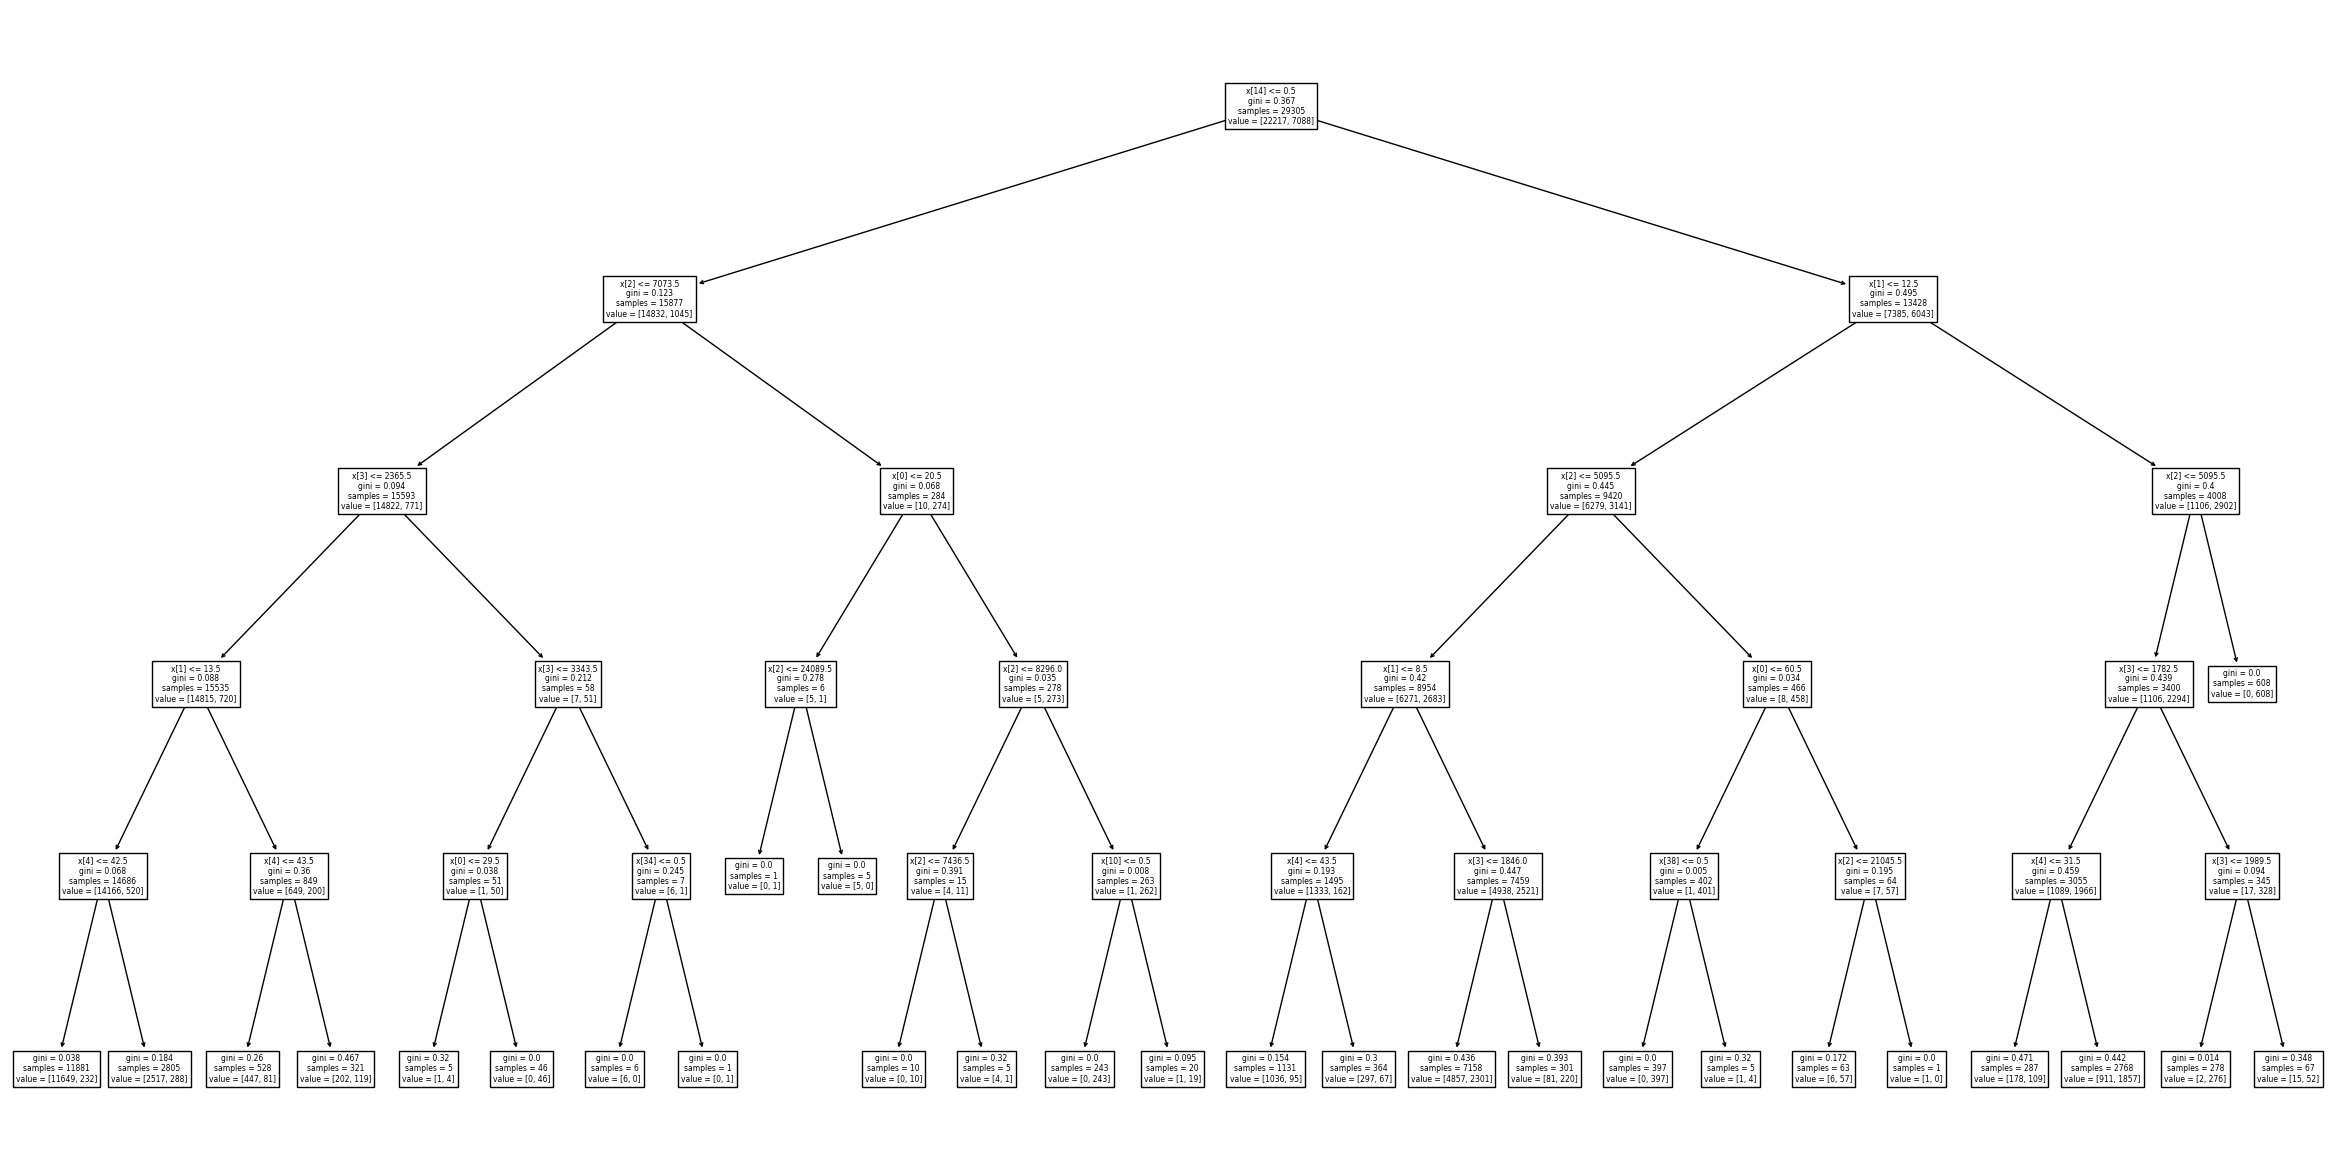

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15))
plot_tree(model)
plt.show()

- 위 모델은 우리가 마지막에 훈련시킨 max_depth=7의 결과물입니다. 7로 제한했음에도 너무 거대한 트리라서 내용을 확인할 수 없을 정도로 작게 표현되었습니다. 따라서 이 트리의 전체를 보기보다는 중요하다고 여겨지는 윗 부분(3단계까지) 만을 확대해서 보겠습니다. 그 밖에 폰트 크기를 조정하는 매개변수도 추가하겠습니다.

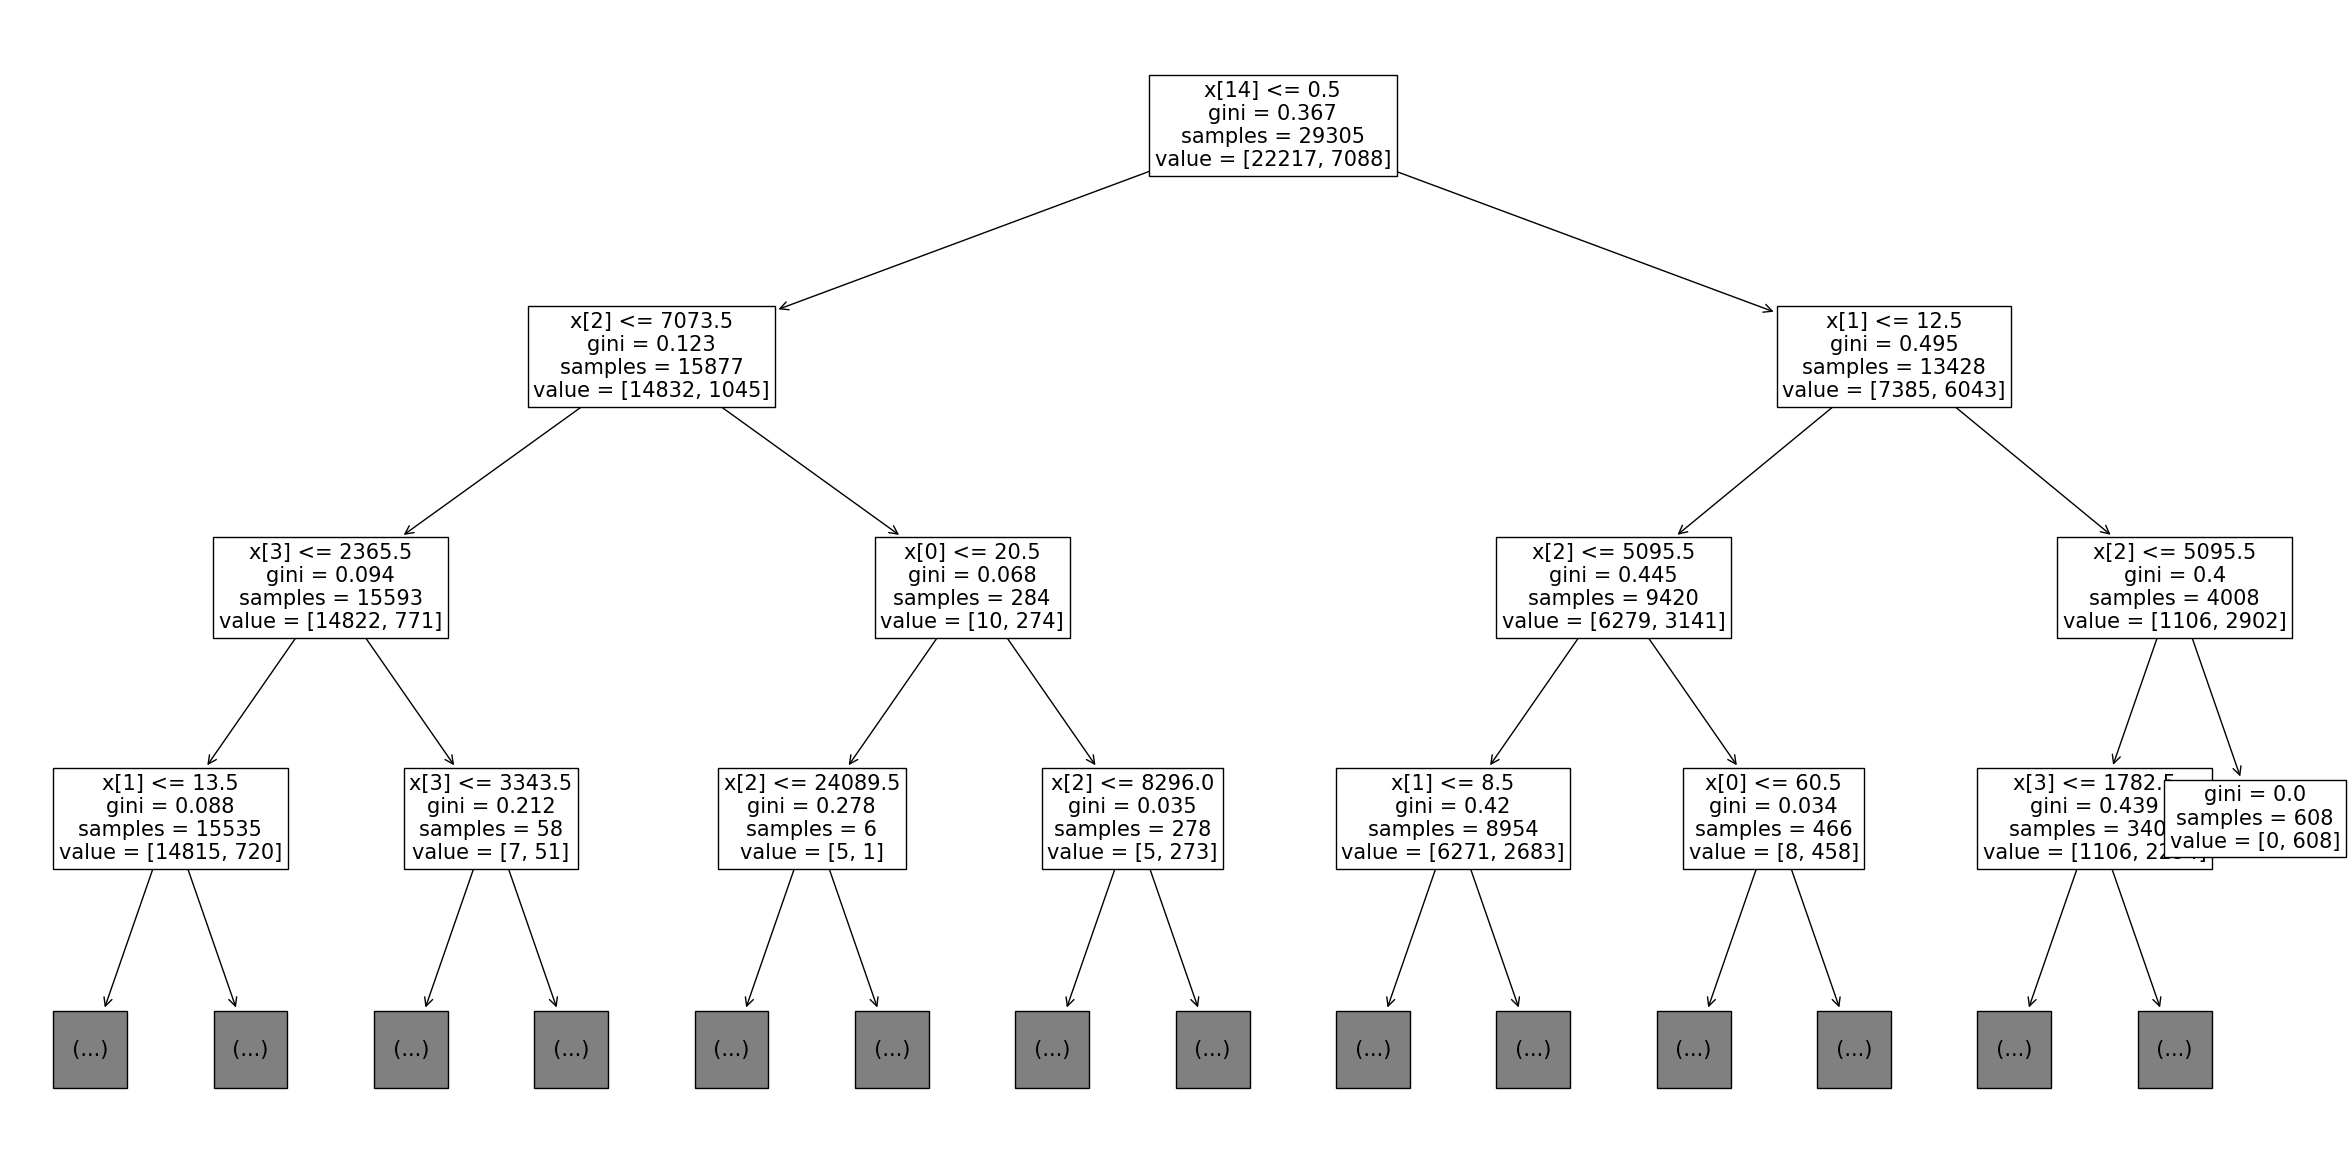

In [ ]:
plt.figure(figsize=(30, 15))                  # 그래프 크기 조정
plot_tree(model, max_depth=3, fontsize=15)    # 깊이와 폰트 크기 조정하여 트리 그래프 출력
plt.show()  # 불필요한 문자가 나오지 않게 출력

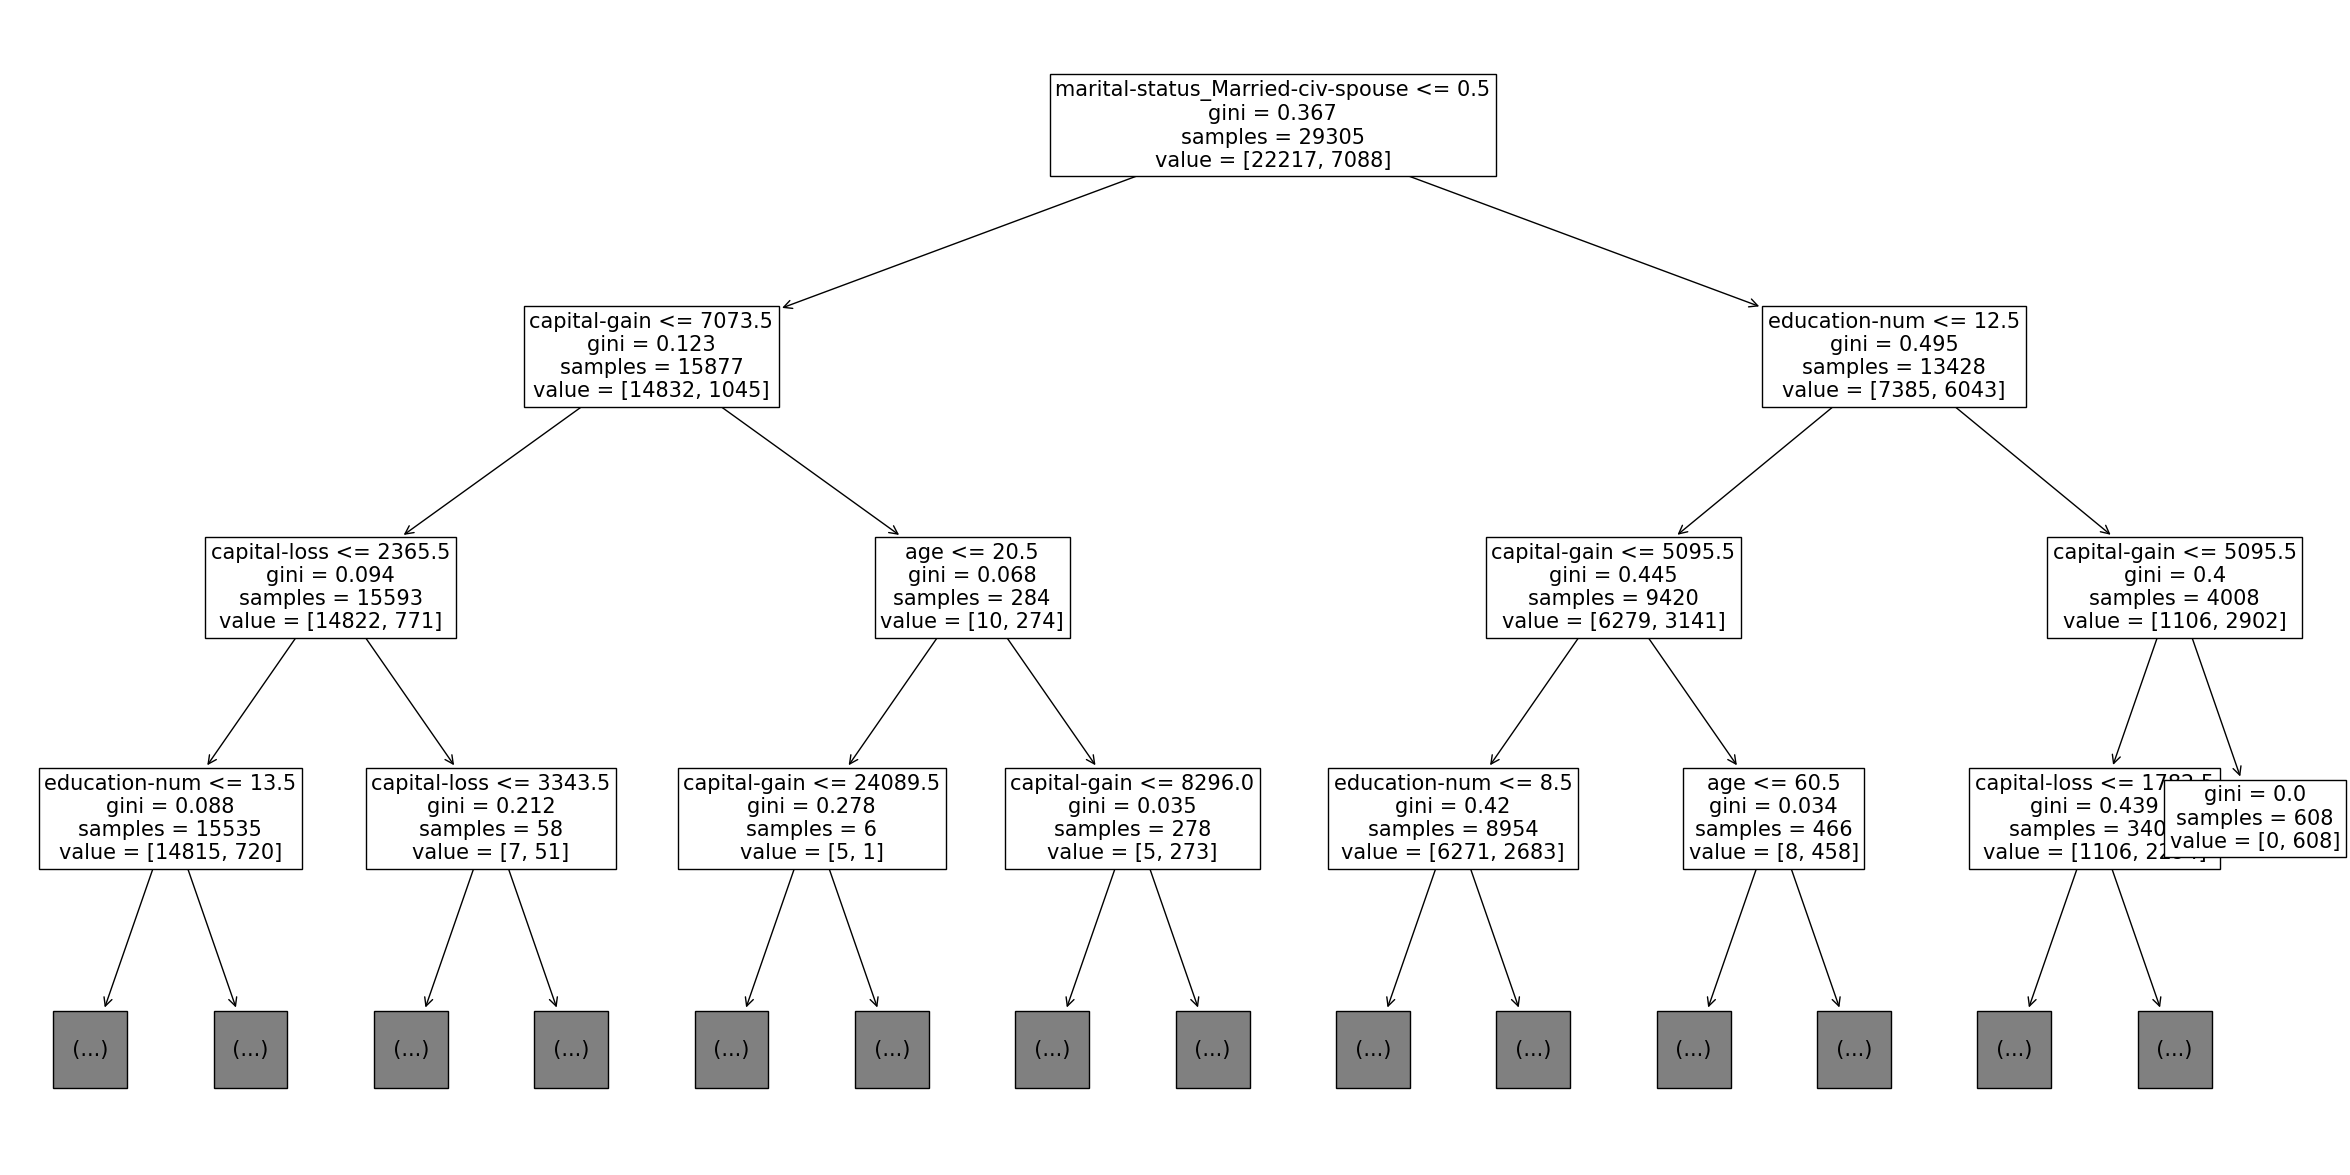

In [ ]:
# 그래프 크기 조정
plt.figure(figsize=(30, 15))
# 변수 이름을 추가하여 그래프 출력
plot_tree(model, max_depth=3, fontsize=15, feature_names=X_train.columns)
# 불필요한 문자가 나오지 않게 출력
plt.show()

#09.랜덤포레스트 (중고차 가격 예측하기)
- 랜덤포레스트 모델은 결정 트리의 단점인 오버피팅 문제를 완화시켜주는 발전된 형태의 트리 모델입니다. 랜덤으로 생성 된 무수히 많은 트리를 이용하여 예측을 하기 때문에 랜덤 포레스트라 불립니다. 이렇게 여러 모델(여기서는 결정트리)을 활용하여 하나의 모델을 이루는 기법을 앙상블 이라 부릅니다.
- 앙상블 기법을 사용한 트리 기반 모델 중 가장 보편적인 방법입니다. 이후에 다루게 될 부스팅 모델에 비하면 예측력이나 속도에서 부족한 부분이 있고, 시각화에서는 결정 트리에 못 미치나, 다음 단계인 부스팅 모델을 이해하려면 꼭 알아야 할 필수 알고리즘입니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/car.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# 결측치 확인 : mileage, engine, max_power, torque, seats
# 숫자형이 더 적합함 : engine
data.info()   # 변수 특징 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
round(data.describe(), 2)   # 통계 정보 출력
# 아웃라이어가 몇 개 보입니다. 예를 들어 seling_price에서 max값이 유독 높습니다.
# km_driven은 max와 min 모두 아웃라이어로 보여집니다.
# 선형모델은 아웃라이어에 대한 처리가 필요하지만 여기서는 트리모델을 사용하므로
# 아웃라이어를 별도로 처리하지 않겠습니다.

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


##9.3 전처리 : 텍스트 데이터
- 문자형 데이터를 숫자형으로 바꾸어야 연산이 가능합니다.
  - 그래서 첫 번째 작업으로는 단위 일치 및 숫자형으로 변환을 진행합니다. 단위가 섞여 있으므로 단위를 통일하고 그에 맞게 값을 계산을 해주고 단위에 해당하는 텍스트를 제거해 숫자형으로 변경하는 과정입니다.
- 두 번째는 텍스트 분류입니다.
  - 불필요하게 구체적인 내용의 텍스트는 버리고, 필요한 부분만 남기겠습니다.

- 우선 숫자형 데이터로 변경 할 컬럼들을 다루겠습니다.
  - mileage, engine, max_power, torque 변수에서 숫자와 문자가 혼재되어 있습니다.
  - 숫자와 문자를 분리시키고 숫자의 자료형을(소수점까지 표현해야 하므로) float형으로 지정해야 합니다.

###9.3.1 engine 변수 전처리하기
1. split() 함수로 숫자와 문자를 각각 더미 변수로 생성합니다.
2. astype()으로 0열을 숫자형으로 변환합니다.
3. 1열 값은 모두 'CC'이므로, drop() 함수로 제거합니다.

In [6]:
print(data['engine'].head(5))

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object


In [7]:
# 공백 기준으로 문자를 분할하여 별도의 변수로 출력
data['engine'].str.split(expand=True)

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [8]:
data['engine'].str.split()

,engine
0,"[1248, CC]"
1,"[1498, CC]"
2,"[1497, CC]"
3,"[1396, CC]"
4,"[1298, CC]"
...,...
8123,"[1197, CC]"
8124,"[1493, CC]"
8125,"[1248, CC]"
8126,"[1396, CC]"


In [9]:
# 숫자형 변수는 기존 engine 변수에 덮어쓰고,
# 문자형 변수는 engine_unit이라는 새로운 변수이름에 할당한다.
data[['engine', 'engine_unit']] = data['engine'].str.split(expand=True)

In [11]:
# engine 변수를 확인하면, 숫자만 남아있습니다.
data[['engine', 'engine_unit']].head()

,engine,engine_unit
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC


In [12]:
# 그러나 결과물을 보면, 맨 아래에 dtype:object 로 되어 있습니다.
# 즉 숫자만 남았지만 이 데이터는 아직도 문자형 데이터로 인식되는 겁니다.
# astype() 함수를 이용하여, 이를 숫자형 데이터로 변환해 줍니다.
data['engine'] = data['engine'].astype('float32')     # 숫자형 변수로 변환

In [13]:
# dtype이 float32로 변경됨.
data['engine'].head()

,engine
0,1248.0
1,1498.0
2,1497.0
3,1396.0
4,1298.0


In [14]:
# 다음은 engine_unit을 확인해봅시다. 문자 부분을 버리지 않고 굳이 남겨둔 이유는,
# 간혹 다른 단위를 가지는 데이터가 있을 수 있기 때문입니다.
# 우리가 head()로 확인한 engine의 데이터 값에는 'CC'라는 단위만 있었습니다.
# 혹시 확인하지 못한 다른 라인에 다른 단위가 붙어 있나 확인하고 넘어가겠습니다.
data['engine_unit'].unique()

array(['CC', nan], dtype=object)

In [16]:
data['engine_unit'].isnull().sum()

221

In [15]:
data['engine_unit'].value_counts()

,count
engine_unit,
CC,7907


In [17]:
# 'CC'라는 값 한 가지만 존재합니다.
# 해당 컬럼은 삭제합니다.
data.drop('engine_unit', axis=1, inplace=True)    # 변수 제거

###9.3.2. max_power 변수 전처리 하기
- engine 변수와 같은 방식으로 max_power 변수도 변환합니다.

In [18]:
data['max_power'].head()

,max_power
0,74 bhp
1,103.52 bhp
2,78 bhp
3,90 bhp
4,88.2 bhp


In [19]:
data[['max_power', 'max_power_unit']] = data['max_power'].str.split(expand=True)

In [20]:
data[['max_power', 'max_power_unit']].head()

,max_power,max_power_unit
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp


In [21]:
# 언뜻 보기에 잘 변환된 것으로 보입니다. 그러나 숫자형 변수로 변환하려고 하면 에러가 발생합니다.
data['max_power'] = data['max_power'].astype('float32')

ValueError: could not convert string to float: 'bhp'

In [22]:
# 이런 메시지를 만나게 되면, 가장 먼저 확인할 부분은 가장 아랫줄입니다.
# ValueError입니다. 'bhp'라는 string을 float로 바꿀수 없나느 내용입니다.
# 진짜로 이런 데이터값이 있는 지 확인합니다.
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


- float 형변환 함수 구현
  - 예외(except) 상황 시에는 np.nan 반환

In [23]:
def isFloat(value):     # 함수 정의
  try:
    num = float(value)  # 값을 숫자로 변환
    return num          # 변환 된 값 리턴
  except ValueError:    # try에서 ValueError가 난 경우
    return np.nan       # np.nan 리턴

In [24]:
# isFloat 함수를 사용하여, 숫자형 변수로 변환
data['max_power'] = data['max_power'].apply(isFloat)

In [25]:
# max_power_unit 도 확인
data['max_power_unit'].unique()

array(['bhp', nan, None], dtype=object)

In [26]:
# 'bhp' 이 외에 Null값들이 있습니다. 적어도 다른 단위는 아니므로 따로 조치해줄 필요는 없습니다.
# 이 컬럼도 제거 하겠습니다.
data.drop('max_power_unit', axis=1, inplace=True)

###9.3.3 mileage 변수 전처리 하기
- mileage 변수를 같은 방법으로 숫자와 문자로 분리하겠습니다.

In [27]:
data['mileage'].head()

,mileage
0,23.4 kmpl
1,21.14 kmpl
2,17.7 kmpl
3,23.0 kmpl
4,16.1 kmpl


In [28]:
# 분할 된 문자들을 새로운 변수들로 저장
data[['mileage', 'mileage_unit']] = data['mileage'].str.split(expand=True)

In [29]:
data[['mileage', 'mileage_unit']].head()

,mileage,mileage_unit
0,23.4,kmpl
1,21.14,kmpl
2,17.7,kmpl
3,23.0,kmpl
4,16.1,kmpl


In [30]:
# 숫자만 남은 mileage 변수를 숫자형 데이터로 변환
data['mileage'] = data['mileage'].astype('float32')

In [31]:
data['mileage_unit'].unique()   # 고유값 확인

array(['kmpl', 'km/kg', nan], dtype=object)

In [32]:
# fuel에 어떤 종류의 연료들이 있는지 확인!
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

- 연료의 종류는 4가지 입니다. 다른 종류의 연료로 주행거리를 비교하려면 같은 기준을 세워야 합니다.
  - 연료의 가격을 활용하도록 하겠습니다. 즉 1달러당 몇 km를 주행할 수 있는지를 비교하여 비교를 하겠습니다.
- 구글에서 각 연료의 동일 시점의 가격을 검색하였습니다.
  - Petrol : 리터당 $80.43
  - Diesel : 리터당 $73.56
  - LPG    : 킬로그램당 $40.85
  - CNG    : 킬로그램당 $44.23

In [25]:
# mileage 변수를 연료별 가격으로 나누면 1달러당 주행거리가 됩니다.
# 이를 계산해주는 함수를 만듭니다.
def mile(x):
  if x['fuel'] == 'Petrol':           # fuel이 Petrol이면,
    return x['mileage'] / 80.43       #   mileage를 80.43으로 나눔
  elif x['fuel'] == 'Diesel':         # fuel이 Diesel이면,
    return x['mileage'] / 73.56       #   mileage를 73.56으로 나눔
  elif x['fuel'] == 'LPG':            # fuel이 LPG이면,
    return x['mileage'] / 40.85       #   mileage를 40.85로 나눔
  else:                               # 그 밖에는
    return x['mileage'] / 44.23       #   mileage를 44.23으로 나눔

In [26]:
# 이 함수에서는 fuel과 mileage 두 변수를 사용합니다.
# 그래서 함수를 호출할때 입력 값 x는 data 전체여야 합니다.
data['mileage'] = data.apply(mile, axis=1)    # mile함수로 마일리지 수정

In [33]:
data['mileage_unit'].head()

,mileage_unit
0,kmpl
1,kmpl
2,kmpl
3,kmpl
4,kmpl


In [ ]:
# 이제 mileage_unit 컬럼은 필요가 없으므로 제거합니다.
data.drop('mileage_unit', axis=1, inplace=True)

###9.3.4 toque 변수 전처리하기

In [36]:
data['torque'].head()

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)"
3,22.4 kgm at 1750-2750rpm
4,"11.5@ 4,500(kgm@ rpm)"


In [37]:
# torque변수 대문자료 변환
data['torque'] = data['torque'].str.upper()
data['torque'].head()

,torque
0,190NM@ 2000RPM
1,250NM@ 1500-2500RPM
2,"12.7@ 2,700(KGM@ RPM)"
3,22.4 KGM AT 1750-2750RPM
4,"11.5@ 4,500(KGM@ RPM)"


In [38]:
# 해당 값 안에 NM혹은 KGM이 있는지 판별하여 해당 단위를 반환하는 함수 생성
def torque_unit(x):       # 함수 정의
  if 'NM' in str(x):      # x에 NM이 있으면
    return 'Nm'           # Nm을 리턴
  elif 'KGM' in str(x):   # x에 KGM이 있으면
    return 'kgm'          # kgm리턴

In [39]:
# 위 함수를 torque 변수에 적용시키고, 결과물을 torque_unit 이라는 이름의 새로운 컬럼으로 저장
data['torque_unit'] = data['torque'].apply(torque_unit)

In [40]:
# torque_unit에 단위값이 잘 들어갔는지 확인한다.
data['torque_unit'].unique()

array(['Nm', 'kgm', None], dtype=object)

In [41]:
# torque_unit 가 Null인 것이있는지 확인
print(data['torque_unit'].isna())

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126    False
8127    False
Name: torque_unit, Length: 8128, dtype: bool


In [42]:
# torque_unit 가 Null인 것의 전체 데이터 검색
print(data[data['torque_unit'].isna()])

                                      name  year  selling_price  km_driven  \
13                    Maruti Swift 1.3 VXi  2007         200000      80000   
31                      Fiat Palio 1.2 ELX  2003          70000      50000   
78                         Tata Indica DLS  2003          50000      70000   
87             Maruti Swift VDI BSIV W ABS  2015         475000      78000   
119                  Maruti Swift VDI BSIV  2010         300000     120000   
...                                    ...   ...            ...        ...   
7846                Toyota Qualis Fleet A3  2000         200000     100000   
7996             Hyundai Santro LS zipPlus  2000         140000      50000   
8009  Hyundai Santro Xing XS eRLX Euro III  2006         145000      80000   
8068             Ford Figo Aspire Facelift  2017         580000     165000   
8103                  Maruti Swift 1.3 VXi  2006         130000     100000   

        fuel seller_type transmission         owner  mileage  e

- 결과물을 보니 Nm도 kgm도 없는 데이터와 NAN으로 입력된 데이터값이 있습니다.
- 우선 Nm도 kgm도 써있지 않은 데이터가 kgm중 하나에 속한다는 전제하에 추론해봅시다.
- 다른 데이터를 보면
  - Nm은 보통 100, 200 등 백 단위이고,
  - kgm은 10,20 등 십 단위 숫자입니다.
- 숫자 크기를 고려하면, 모두 Nm에 해당한다고 추론할 수 있습니다.
- torque_unit의 빈 값을 모두 Nm으로 채우겠습니다.

In [45]:
# # torque_unit 이 결측치인 라인의 torque 변수 교유값 확인
print(data[data['torque_unit'].isna()]['torque'].unique())

[nan '250@ 1250-5000RPM' '510@ 1600-2400' '110(11.2)@ 4800' '210 / 1900']


In [46]:
# torque_unit 의 결측치를 Nm으로 대체
data['torque_unit'].fillna('Nm', inplace = True)

In [47]:
data['torque'].head()

,torque
0,190NM@ 2000RPM
1,250NM@ 1500-2500RPM
2,"12.7@ 2,700(KGM@ RPM)"
3,22.4 KGM AT 1750-2750RPM
4,"11.5@ 4,500(KGM@ RPM)"


In [48]:
# torque 변수에서 맨 앞 숫자 부분을 빼내야 한다.
string_example = '12.7@ 2,700(KGM@ RPM)'      # 예제 스트링 정의

In [49]:
string_example[:4]

'12.7'

In [50]:
for i,j in enumerate(string_example):
  print(i, j)

0 1
1 2
2 .
3 7
4 @
5  
6 2
7 ,
8 7
9 0
10 0
11 (
12 K
13 G
14 M
15 @
16  
17 R
18 P
19 M
20 )


In [51]:
def split_num(x):
  x = str(x)
  for i, j in enumerate(x):
    if j not in '0123456789.':
      cut = i
      break
  return x[:cut]

In [52]:
# torque 변수를 split_num 함수에 적용
data['torque'] = data['torque'].apply(split_num)

In [53]:
data['torque']    # torque 변수 확인

,torque
0,190
1,250
2,12.7
3,22.4
4,11.5
...,...
8123,113.7
8124,24
8125,190
8126,140


In [54]:
data['torque'] = data['torque'].astype('float64')   # 숫자 형태로 변환

ValueError: could not convert string to float: ''

- string을 float로 변경할 수 없다는 오류입니다. 비어있는 string값 ''이 있는 것 같습니다. Null로 대체하겠습니다.

In [55]:
data['torque'] = data['torque'].replace('', np.NaN)   # ''를 결측치로 대체

In [56]:
data['torque'] = data['torque'].astype('float64')     # 숫자 형태로 변환

In [57]:
data['torque'].head()

,torque
0,190.0
1,250.0
2,12.7
3,22.4
4,11.5


In [61]:
# 단위에 따른 차이를 맞춰주는 변환을 해줘야 합니다.
# Nm과 kgm은 중력과 관련된 것으로 kgm * 9.8066 = Nm 입니다.
# 이를 활용하여 kgm일때는 9.80660 을 곱한 값을 반환하고, kgm이 아니면 그대로 반환
def torque_trans(x):                  # 함수 정의
  if x['torque_unit'] == 'kgm':       # torque_unit 이 kgm이면,
    return x['torque'] * 9.8066       # torque 변수에 9.8066을 곱하여 리턴
  else:                               # 아닐 경우
    return x['torque']                # torque 변수 그냥 리턴

In [62]:
# torque 변수에 torque_trans 함수 적용
data['torque'] = data.apply(torque_trans, axis=1)

In [63]:
data['torque_unit'].unique()

array(['Nm', 'kgm'], dtype=object)

In [64]:
# torque_unit 은 더 이상 필요하지 않으므로 삭제합니다.
data.drop('torque_unit', axis=1, inplace=True)    # 변수 제거

In [65]:
data.head()   # 상위 5줄 확인

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.00,190.000000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.52,250.000000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.00,1221.351425,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.00,2154.194640,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.20,1105.948141,5.0


###9.3.5 name 변수 전처리하기

- name 변수는 자동차의 브랜드/모델명이 기입 된 변수입니다.
- 수 많은 자동차 모델을 다 담아내면 좋겠지만, 그렇게 되면 더비 변수를 만들었을때 수 많은 컬럼이 추가되므로 좋지 않습니다.
- 꼭 필요하다면 수 많은 컬럼이 생기더라도 유지하는 것이 좋습니다.
  - 어떤 모델 이름이냐보다는 그 모델이 가지고 있는 자동차의 특성, 즉 engine, max_power, torque 등이 더 중요하다고 볼 수 있습니다.
- 다만 여기서 한 가지 가지고 가야 할 것은 브랜드입니다. 동일 스펙의 자동차라도 비싼 브랜드의 경우 가격이 더 비쌀 수 밖에 없으므로, 모델명을 버리더라도 브랜드명은 꼭 가져가는 것이 좋겠습니다.

In [66]:
data['name'].head()

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII


- name 변수에서 브랜드명만 따로 분리하겠습니다.
- head()에서 보이는 값들을 보면 브랜드명은 맨 앞에 위치해 있고, 띄어쓰기로 모델명과 구분되어 있으므로, str.split()으로 쉽게 분리할 수 잇습니다.
  - 다만 모델명에 수많은 띄어쓰기가 있으므로 이를 모두 컬럼으로 만들면 불필요한 수많은 컬럼이 나타납니다.
  - 불필요한 컬럼은 따로 저장할 필요가 없으므로, 가장 첫 컬럼인 [0]만 인덱싱하여 브랜드 이름을 name 변수에 그대로 덮어쓰기 해주겠습니다.

In [68]:
data['name'].str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Swift,Dzire,VDI,None,None,None,None,None,None
1,Skoda,Rapid,1.5,TDI,Ambition,None,None,None,None,None
2,Honda,City,2017-2020,EXi,None,None,None,None,None,None
3,Hyundai,i20,Sportz,Diesel,None,None,None,None,None,None
4,Maruti,Swift,VXI,BSIII,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,Magna,None,None,None,None,None,None,None
8124,Hyundai,Verna,CRDi,SX,None,None,None,None,None,None
8125,Maruti,Swift,Dzire,ZDi,None,None,None,None,None,None
8126,Tata,Indigo,CR4,None,None,None,None,None,None,None


In [69]:
# name 변수를 공백으로 나누고 첫 번째 부분으로 업데이트
data['name'] = data['name'].str.split(expand=True)[0]

In [70]:
data['name'].unique()   # 고유값 확인

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

- 띄어쓰기로 인하여 Land Rover가 Land로만 저장된 것 이외에 모두 제대로 된 브랜드 이름입니다.
  - Land라는 이름으로 저장됐다고 해도 모델링에는 영향이 없으나, 연습삼아 해당 이름을 Land Rover로 변경해주고 넘어가겠습니다.

In [72]:
# Land 를 Land Rover로 대체
data['name'] = data['name'].replace('Land', 'Land Rover')

In [73]:
data['name'].unique()   # 고유값 확인

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

##9.4 전처리 : 결측치 처리와 더미 변수 변환

In [74]:
# 결측치 : mileage, engine, max_power, torque, seats
data.isna().mean() * 100    # 변수 별 결측치의 평균 확인(%)

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage,2.718996
engine,2.718996


- 스펙 관련 된 모든 값을 평균값으로 치환할 경우 오히려 노이즈 역할만 할 가능성도 높습니다.
- 결측치의 비율또한 2% 수준으로 높지 않기때문에 여기서는 과감하게 해당 행을 모두 제거하겠습니다.
- 만약 제거에 확신이 서지 않는 상황이라면,
  - 제거하는 방법과 평균치로 치환하는 방법 모두를 사용해보시고
모델링 결과를 비교해보아도 좋습니다.

In [76]:
data.dropna(inplace=True)   # 결측치행 제거
len(data)                   # 데이터 길이 확인

7906

In [77]:
# 결측치가 제거 되었으므로, 남은 텍스트 컬럼을 더미 변수로 변환하겠습니다.
# 대상이 되는 변수는 name, fuel, seller_type, transmission, owner 입니다.
data = pd.get_dummies(data, columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first = True)    # 더미변수 변환

In [78]:
# 변환이 완료 되었으면, head()를 통해 최종 데이터셋을 확인해보시기 바랍니다.
data.head()     # 상위 5줄 확인

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.400000,1248.0,74.00,190.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,21.139999,1498.0,103.52,250.000000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,17.700001,1497.0,78.00,1221.351425,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,23.000000,1396.0,90.00,2154.194640,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,16.100000,1298.0,88.20,1105.948141,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False


## 9.5 모델링 및 평가하기

우선 훈련셋과 시험셋을 나누어 줍니다.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis = 1), data['selling_price'], test_size = 0.2, random_state = 100)

- 랜덤 포레스트 모델은 사이킷런에서 ensemble 패키지 안에 속해 있습니다.
  - 결정 트리와 마찬가지로 RandomForestRegressor 와 RandomForestClassifier 를 제공하는데,
  - 이번 데이터는 연속형 변수가 타깃이므로, **RandomForestRegressor** 를 사용하겠습니다.

In [80]:
from sklearn.ensemble import RandomForestRegressor      # 임포트

모델링 및 예측 방법은 기존 다른 모델과 같습니다.

In [81]:
# 랜덤 포레스트는 매번 다른 방식으로 나무들을 생성하므로, random_state를 지정하는 것이 좋습니다.
model = RandomForestRegressor(random_state = 100)       # 모델 객체 생성

In [83]:
model.fit(X_train, y_train)                 # 학습
train_pred = model.predict(X_train)         # 훈련셋 예측
test_pred = model.predict(X_test)           # 시험셋 예측

In [84]:
from sklearn.metrics import mean_squared_error

print('train_rmse : ', mean_squared_error(y_train, train_pred) ** 0.5,
      'test_rmse : ', mean_squared_error(y_test, test_pred) ** 0.5)

train_rmse :  53739.996816971194 test_rmse :  132187.90821785651


##9.6 이해하기 : K-폴드 교차검증
- 다양항 훈련셋/시험셋을 통하여 모델에 더 신뢰할 수 있는 평가를 하는 방법
- 교차검증(cross validation)의 목적은 모델의 예측력을 더 안정적으로 평가하기 위함입니다.(교차타당성 이라고도 합니다.)
- K-폴드 교차검증
  - 데이터를 특정 개수(K개)로 쪼개어서 그 중 하나씩을 선택하여 시험셋으로 사용하되, 이 과정을 K번만큼 반복하는 겁니다.

In [85]:
from sklearn.model_selection import KFold

- KFold를 사용하기에 앞서, 우리가 가진 데이터의 인덱스를 한 번 정리해줄 필요가 있습니다.
  - data를 호출하여 현재 데이터의 인덱스를 살펴봅시다.

In [86]:
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.400000,1248.0,74.00,190.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,21.139999,1498.0,103.52,250.000000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,17.700001,1497.0,78.00,1221.351425,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,23.000000,1396.0,90.00,2154.194640,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,16.100000,1298.0,88.20,1105.948141,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.500000,1197.0,82.85,113.700000,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
8124,2007,135000,119000,16.799999,1493.0,110.00,2308.065685,5.0,False,False,...,True,False,False,True,False,True,True,False,False,False
8125,2009,382000,120000,19.299999,1248.0,73.90,190.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
8126,2013,290000,25000,23.570000,1396.0,70.00,140.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False


- 왼쪽 인덱스를 보면 0부터 8127까지 있지만, 실제로는 7906줄입니다.
  - 이는 우리가 중간에 dropna()를 사용하여, 약 2% 정도 되는 줄을 제거했기 때문입니다.
  - KFold는 이 인덱스 값을 이용하여 데이터를 분할하는데, 이와 같이 중간에 빈 값이 존재하면 에러가 발생하므로, reset_index()를 사용하여 인덱스를 정리해주겠습니다.
    - drop 매개변수를 사용하지 않으면 기존 인덱스가 새로운 컬럼 형태로 추가되기 때문에 drop = True를 꼭 입력해줍니다.

In [87]:
data.reset_index(drop = True, inplace = True)

In [88]:
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.400000,1248.0,74.00,190.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,21.139999,1498.0,103.52,250.000000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,17.700001,1497.0,78.00,1221.351425,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,23.000000,1396.0,90.00,2154.194640,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,16.100000,1298.0,88.20,1105.948141,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,18.500000,1197.0,82.85,113.700000,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
7902,2007,135000,119000,16.799999,1493.0,110.00,2308.065685,5.0,False,False,...,True,False,False,True,False,True,True,False,False,False
7903,2009,382000,120000,19.299999,1248.0,73.90,190.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
7904,2013,290000,25000,23.570000,1396.0,70.00,140.000000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False


- 다음은 KFold()에서 몇 개의 데이터로 분할할지 지정해주고, 그 속성을 kf라는 이름으로 저장합니ㅏ. 여기서는 5개로 분할해보겠습니다.

In [89]:
kf = KFold(n_splits = 5)      # KFold 객체 생성

- 독립변수(X), 종속변수(y)로 나눠줍니다.

In [90]:
X = data.drop(['selling_price'], axis = 1)
y = data['selling_price']

- kf에 내재되어 있는 split() 함수로 데이터인 X를 분할하고, 이 결과값을 출력하겠습니다.
  - kf에는 이미 5개로 분할한다는 정보가 저장되어 있기 때문에, for문을 사용하면 총 5개의 다른 인덱스를 보여줍니다.

In [91]:
for i, j in kf.split(X):
  print(i, j)

[1582 1583 1584 ... 7903 7904 7905] [   0    1    2 ... 1579 1580 1581]
[   0    1    2 ... 7903 7904 7905] [1582 1583 1584 ... 3160 3161 3162]
[   0    1    2 ... 7903 7904 7905] [3163 3164 3165 ... 4741 4742 4743]
[   0    1    2 ... 7903 7904 7905] [4744 4745 4746 ... 6322 6323 6324]
[   0    1    2 ... 6322 6323 6324] [6325 6326 6327 ... 7903 7904 7905]
